# **Deep Learning for AI Project - Best Artwork**

Porta Maria 5110290

Fazio Matteo 5105711 


# Project description
The extensive database description is provided in the "Best Artwork of All Times" page on Kaggle
[[https://www.kaggle.com/datasets/ikarus777/best-artworks-of-all-time/discussion](https://www.kaggle.com/datasets/ikarus777/best-artworks-of-all-time/discussion)]
where it is also possible to download the dataset at the following link: 
[[https://www.kaggle.com/datasets/ikarus777/best-artworks-of-all-time/download?datasetVersionNumber=1]](https://www.kaggle.com/datasets/ikarus777/best-artworks-of-all-time/download?datasetVersionNumber=1).
  
The dataset is composed of three main parts:
> The folder containing the images divided in artists.

> A folder containing all images resized and mixed up.

> A .csv file containig general informations regarding the authors, the number of images per author and some historical and style characteristic.


# Importing necessary packages

Here we are going to install all libraries and packages that we will require through the whole project.

In [ ]:
!pip install torch torchvision
!pip install d2l==1.0.0a1.post0 
!pip install gitpython
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torch.nn as nn
from sklearn import preprocessing
from torch.nn import functional as F
from torch.utils import data
from d2l import torch as d2l
import numpy as np
import torchvision
from torchvision import transforms, datasets
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset
from sklearn.model_selection import KFold
import statistics 
from statistics import mode
import matplotlib.pyplot as plt
import git
from git import Repo
import os
import pandas as pd
import requests
import shutil
import cv2
import seaborn as sns
import warnings
from torchvision.utils import save_image
import PIL
from PIL import Image 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from torch.utils.data import DataLoader, ConcatDataset
import torchmetrics
from torchmetrics import ConfusionMatrix
d2l.use_svg_display()
%matplotlib inline
from sklearn.metrics import confusion_matrix,f1_score,classification_report
from __future__ import print_function
import argparse
import os
import random
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from torch.nn.modules.batchnorm import BatchNorm1d
import tensorflow as tf

For storing purposes we also created a drive folder for it provided a more intutitive way for saving weights (for the GAN) and outputs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preparation and Exploratory Analysis

In order to allow us to work on different devices more easily we created a GitHub repository where we stored all the dataset we are going to use.

Now we are reading the .csv file containing information on the artists.

In [ ]:
url = 'https://raw.githubusercontent.com/matteofazio/Deep-Learning-for-AI/main/artists.csv'
df = pd.read_csv(url)

In [ ]:
df

id                       name        years  \
0    0          Amedeo Modigliani  1884 - 1920   
1    1         Vasiliy Kandinskiy  1866 - 1944   
2    2               Diego Rivera  1886 - 1957   
3    3               Claude Monet  1840 - 1926   
4    4              Rene Magritte  1898 - 1967   
5    5              Salvador Dali  1904 - 1989   
6    6              Edouard Manet  1832 - 1883   
7    7              Andrei Rublev  1360 - 1430   
8    8           Vincent van Gogh  1853 – 1890   
9    9               Gustav Klimt  1862 - 1918   
10  10           Hieronymus Bosch  1450 - 1516   
11  11           Kazimir Malevich  1879 - 1935   
12  12             Mikhail Vrubel  1856 - 1910   
13  13              Pablo Picasso  1881 - 1973   
14  14          Peter Paul Rubens  1577 - 1640   
15  15      Pierre-Auguste Renoir  1841 - 1919   
16  16             Francisco Goya  1746 - 1828   
17  17                Frida Kahlo  1907 - 1954   
18  18                   El Greco  1541 - 1614   
19  19             Albrecht Dürer  1471 - 1528   
20  20              Alfred Sisley  1839 - 1899   
21  21             Pieter Bruegel  1525 - 1569   
22  22               Marc Chagall  1887 - 1985   
23  23          Giotto di Bondone  1266 - 1337   
24  24          Sandro Botticelli  1445 - 1510   
25  25                 Caravaggio  1571 - 1610   
26  26          Leonardo da Vinci  1452 - 1519   
27  27            Diego Velazquez  1599 - 1660   
28  28              Henri Matisse  1869 - 1954   
29  29               Jan van Eyck  1395 - 1441   
30  30                Edgar Degas  1834 - 1917   
31  31                  Rembrandt  1606 - 1669   
32  32                     Titian  1488 - 1576   
33  33  Henri de Toulouse-Lautrec  1864 – 1901   
34  34            Gustave Courbet  1819 - 1877   
35  35           Camille Pissarro  1830 - 1903   
36  36             William Turner  1775 - 1851   
37  37               Edvard Munch  1863 - 1944   
38  38               Paul Cezanne  1839 – 1906   
39  39           Eugene Delacroix  1798 – 1863   
40  40             Henri Rousseau  1844 – 1910   
41  41             Georges Seurat  1859 – 1891   
42  42                  Paul Klee  1879 – 1940   
43  43              Piet Mondrian  1872 – 1944   
44  44                  Joan Miro  1893 – 1983   
45  45                Andy Warhol  1928 – 1987   
46  46               Paul Gauguin  1848 – 1903   
47  47                    Raphael  1483 – 1520   
48  48               Michelangelo  1475 – 1564   
49  49            Jackson Pollock  1912 – 1956   

                                      genre               nationality  \
0                             Expressionism                   Italian   
1              Expressionism,Abstractionism                   Russian   
2                   Social Realism,Muralism                   Mexican   
3                             Impressionism                    French   
4                  Surrealism,Impressionism                   Belgian   
5                                Surrealism                   Spanish   
6                     Realism,Impressionism                    French   
7                             Byzantine Art                   Russian   
8                        Post-Impressionism                     Dutch   
9                     Symbolism,Art Nouveau                  Austrian   
10                     Northern Renaissance                     Dutch   
11                              Suprematism                   Russian   
12                                Symbolism                   Russian   
13                                   Cubism                   Spanish   
14                                  Baroque                   Flemish   
15                            Impressionism                    French   
16                              Romanticism                   Spanish   
17                   Primitivism,Surrealism                   Mexican   
18                                Mannerism             Spanish,Gr

We visualize astists.csv converted in a DataFrame in order to better investigate the number of images available for each classes and check the possibility of shrinking the number from 50 to around 20 not considering artists with few images.

Indeed we decided to select only those artists with more than 150 images in order to have a sufficient number of images to train our model.

Therefore we proceed in creating a new DataFrame with only those classes we selected and truncating to 200 those containing more than 200 images.
In this way we tailored a DataFrame with 18 balanced classes.

In [ ]:
top_artists = df[df['paintings'] >= 150].reset_index()
top_artists.drop('index', inplace = True, axis=1)
top_artists

id                   name        years  \
0    0      Amedeo Modigliani  1884 - 1920   
1    4          Rene Magritte  1898 - 1967   
2    8       Vincent van Gogh  1853 – 1890   
3   12         Mikhail Vrubel  1856 - 1910   
4   13          Pablo Picasso  1881 - 1973   
5   15  Pierre-Auguste Renoir  1841 - 1919   
6   16         Francisco Goya  1746 - 1828   
7   19         Albrecht Dürer  1471 - 1528   
8   20          Alfred Sisley  1839 - 1899   
9   22           Marc Chagall  1887 - 1985   
10  24      Sandro Botticelli  1445 - 1510   
11  28          Henri Matisse  1869 - 1954   
12  30            Edgar Degas  1834 - 1917   
13  31              Rembrandt  1606 - 1669   
14  32                 Titian  1488 - 1576   
15  42              Paul Klee  1879 – 1940   
16  45            Andy Warhol  1928 – 1987   
17  46           Paul Gauguin  1848 – 1903   

                                      genre               nationality  \
0                             Expressionism                   Italian   
1                  Surrealism,Impressionism                   Belgian   
2                        Post-Impressionism                     Dutch   
3                                 Symbolism                   Russian   
4                                    Cubism                   Spanish   
5                             Impressionism                    French   
6                               Romanticism                   Spanish   
7                      Northern Renaissance                    German   
8                             Impressionism            French,British   
9                               Primitivism  French,Jewish,Belarusian   
10                        Early Renaissance                   Italian   
11         Impressionism,Post-Impressionism                    French   
12                            Impressionism                    French   
13                                  Baroque                     Dutch   
14               High Renaissance,Mannerism                   Italian   
15  Expressionism,Abstractionism,Surrealism              German,Swiss   
16                                  Pop Art                  American   
17             Symbolism,Post-Impressionism                    French   

                                                  bio  \
0   Amedeo Clemente Modigliani (Italian pronunciat...   
1   René François Ghislain Magritte (French: [ʁəne...   
2   Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...   
3   Mikhail Aleksandrovich Vrubel (Russian: Михаи́...   
4   Pablo Ruiz Picasso (; Spanish: [ˈpaβlo piˈkaso...   
5   Pierre-Auguste Renoir, commonly known as Augus...   
6   Francisco José de Goya y Lucientes (; Spanish:...   
7   Albrecht Dürer (; German: [ˈʔalbʁɛçt ˈdyːʁɐ]; ...   
8   Alfred Sisley (; French: [sislɛ]; 30 October 1...   
9   Marc Zakharovich Chagall ( shə-GAHL; born Mois...   
10  Alessandro (c. 1445 – May 17, 1510), known as ...   
11  Henri Émile Benoît Matisse (French: [ɑ̃ʁi emil...   
12  Edgar Degas (US:  or UK: ; born Hilaire-Germai...   
13  Rembrandt Harmenszoon van Rijn (; Dutch: [ˈrɛm...   
14  Tiziano Vecelli or Tiziano Vecellio (pronounce...   
15  Paul Klee (German: [paʊ̯l ˈkleː]; 18 December ...   
16  Andy Warhol (; born Andrew Warhola; August 6, ...   
17  Eugène Henri Paul Gauguin (UK: , US: ; French:...   

                                            wikipedia  paintings  
0      http://en.wikipedia.org/wiki/Amedeo_Modigliani        193  
1          http://en.wikipedia.org/wiki/René_Magritte        194  
2       http://en.wikipedia.org/wiki/Vincent_van_Gogh        877  
3         http://en.wikipedia.org/wiki/Mikhail_Vrubel        171  
4          http://en.wikipedia.org/wiki/Pablo_Picasso        439  
5   http://en.wikipedia.org/wiki/Pierre-Auguste_Re...        336  
6         http://en.wikipedia.org/wiki/Francisco_Goya        291  
7         http://en.wikipedia.org/wiki/Albrecht_Dürer        328  
8          http://en.wikipedia.org/wiki/Alfred_Sisley 

In [ ]:
df[df['paintings'] >= 150].shape[0]

18

From now on we are considering 18 classes corresponding to the above mentioned artists.

Below we inspect classes with more than 200 images and proceed in truncating them.

In [ ]:
sum(top_artists['paintings'] >= 200)

11

In [ ]:
top_artists[['name', 'paintings']][top_artists['paintings'] >= 200]

name  paintings
2        Vincent van Gogh        877
4           Pablo Picasso        439
5   Pierre-Auguste Renoir        336
6          Francisco Goya        291
7          Albrecht Dürer        328
8           Alfred Sisley        259
9            Marc Chagall        239
12            Edgar Degas        702
13              Rembrandt        262
14                 Titian        255
17           Paul Gauguin        311

In [ ]:
da_eliminare = top_artists[['name', 'paintings']][top_artists['paintings'] >= 200]

Here we randomly select the index of the images we are going to drop in the following steps.

In [ ]:
np.random.seed(21 + 800)
idx = []
for i in range(da_eliminare.shape[0]):
    paintings = np.random.choice(da_eliminare.iloc[i,1], size = da_eliminare.iloc[i,1]-200, replace = False)
    paintings = list(paintings)
    idx.append(paintings)

In [ ]:
artists = top_artists['name'].str.replace(' ', '_').values

Check that we are currently in the content folder.

In [ ]:
%pwd

'/content'

We import the DataSet composed of folders of images for each author from our GitHub repository.

In [ ]:
try:
  Repo.clone_from("https://github.com/matteofazio/Deep-Learning-for-AI.git", "/content/DL_for_AI")
except:
  print('Repository already created')

Repository already created


In [ ]:
%cd DL_for_AI

/content/DL_for_AI


We fix this specific name to avoid future problems due to the encoding of the diaeresis.

In [ ]:
updated_name = "Albrecht Dürer"
top_artists.iloc[7, 1] = updated_name

Here we check the existence of a folder for each author we are going to work on.

In [ ]:
images_dir = './images/images'
artists_dirs = os.listdir(images_dir)
artists = top_artists['name'].str.replace(' ', '_').values

# See if all directories exist
for name in artists:
    if os.path.exists(os.path.join(images_dir, name)):
        print("Found -->", os.path.join(images_dir, name))
    else:
        print("Did not find -->", os.path.join(images_dir, name))

Found --> ./images/images/Amedeo_Modigliani
Found --> ./images/images/Rene_Magritte
Found --> ./images/images/Vincent_van_Gogh
Found --> ./images/images/Mikhail_Vrubel
Found --> ./images/images/Pablo_Picasso
Found --> ./images/images/Pierre-Auguste_Renoir
Found --> ./images/images/Francisco_Goya
Found --> ./images/images/Albrecht_Dürer
Found --> ./images/images/Alfred_Sisley
Found --> ./images/images/Marc_Chagall
Found --> ./images/images/Sandro_Botticelli
Found --> ./images/images/Henri_Matisse
Found --> ./images/images/Edgar_Degas
Found --> ./images/images/Rembrandt
Found --> ./images/images/Titian
Found --> ./images/images/Paul_Klee
Found --> ./images/images/Andy_Warhol
Found --> ./images/images/Paul_Gauguin


In [ ]:
da_elim = list(da_eliminare['name'].str.replace(' ', '_').values)
da_elim[4] = "Albrecht_Dürer"

In [ ]:
path = './images/images/'

In the following step we finally truncate those authors with more than 200 images using the random index we selected above.

In [ ]:
l = 0
for i in da_elim:
  path_art = path + i
  list_paintings = os.listdir(path_art)
  for j in idx[l]:
    path_image = path_art+'/'+ list_paintings[j]
    os.remove(path_image)
  l += 1

To give a quick representation of the dataset we plot some images with the corresponding label 

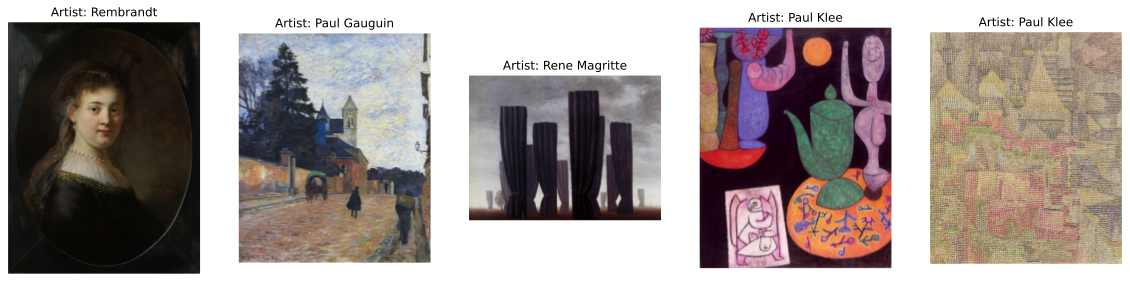

In [ ]:
n = 5
fig, axes = plt.subplots(1, n, figsize=(20,10))

for i in range(n):
    random_artist = np.random.choice(artists)
    random_image = np.random.choice(os.listdir(os.path.join(images_dir, random_artist)))
    random_image_file = os.path.join(images_dir, random_artist, random_image)
    image = plt.imread(random_image_file)
    axes[i].imshow(image)
    axes[i].set_title("Artist: " + random_artist.replace('_', ' '))
    axes[i].axis('off')

plt.show()

Here below we are plotting one random image for each author, in order to have an idea of the possible overlapping of styles and subjects that may create some difficulties in training our network.

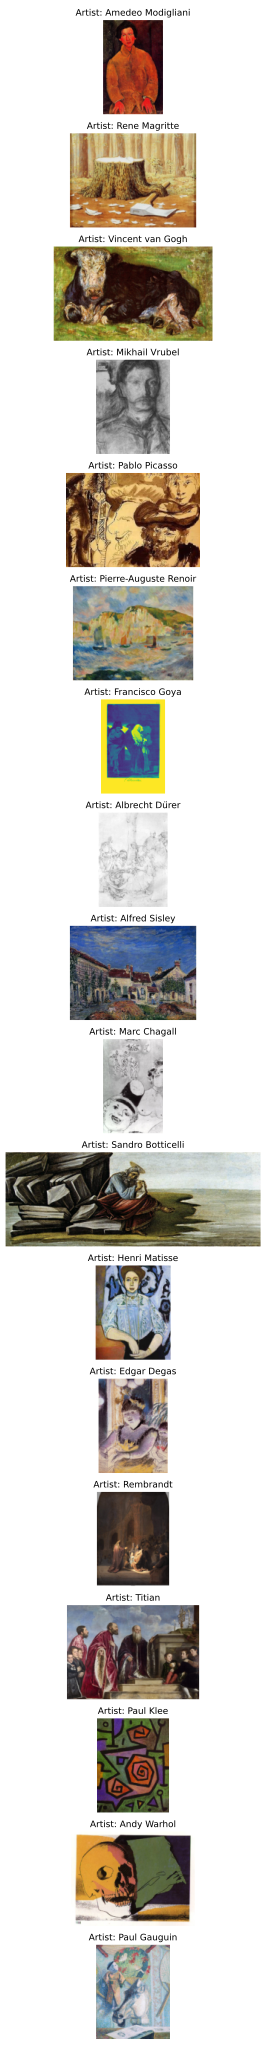

In [ ]:
n = len(artists)
fig, axes = plt.subplots(n,1, figsize=(20,50))

for i in range(n):
    random_artist = artists[i]
    random_image = np.random.choice(os.listdir(os.path.join(images_dir, random_artist)))
    random_image_file = os.path.join(images_dir, random_artist, random_image)
    image = plt.imread(random_image_file)
    axes[i].imshow(image)
    axes[i].set_title("Artist: " + random_artist.replace('_', ' '))
    axes[i].axis('off')

plt.show()

In order to prepare the ground for the analysis we split the dataset in test and train, moving randomly images from the folder of the specific author into costum made folders called "train" and "test".

In [ ]:
%pwd

'/content/DL_for_AI'

In [ ]:
path = os.path.join('./images/train')
os.mkdir(path)

In [ ]:
path = os.path.join('./images/test')
os.mkdir(path)

In [ ]:
for i in list(top_artists['name']):
  a = len(os.listdir('./images/images/'+ i.replace(" ","_")))
  limit = int(0.8*a)
  m = 0
  while m < limit:
    idx = np.random.choice(a-m, size = 1, replace = False)
    path = './images/images/'+i.replace(" ", "_")
    path_image = path + "/" + os.listdir(path)[int(idx)]
    new_path = './images/train/'+ os.listdir(path)[int(idx)]
    shutil.move(path_image,new_path)
    m += 1


In [ ]:
for i in list(top_artists['name']):
  a = len(os.listdir('./images/images/'+ i.replace(" ","_")))
  m = 0
  while m < a:
    path = './images/images/'+i.replace(" ", "_")
    path_image = path + "/" + os.listdir(path)[0]
    new_path = './images/test/'+ os.listdir(path)[0]
    shutil.move(path_image,new_path)
    m += 1

## Data Loader creation

We create a series of functions and classes that will allow us to implement future neural networks more intuitively.

1. *labelization*: we take advantage of the name used for saving the images ( which incldes the name and surname of the author) in order to create the label associated to the specific image.




In [ ]:
def labelization(lst: list, artists_dirs = artists_dirs):
  labels = [None]*len(lst)
  count = 0
  for i in lst:
    i = i.split(sep="_")
    i = "_".join(i[:-1])
    if i == "Albrecht_Du¦êrer":
      i = "Albrecht_Dürer"
    labels[count] = i 
    count +=1
  dummy_list = artists_dirs
  out_list = []
  for i in labels:
    out = 0
    for k in range(18):
      if i == dummy_list[k]:
        out_list.append(k)
  return out_list

2. *MyDataset*: we created a specific class that given the directory returns a Dataset object including both the image and the label. 
This class is very important for the implementation of the following funcions.



In [ ]:
class MyDataset(torch.utils.data.Dataset):

    def __init__(self, root_path, transform=None):
        self.root = root_path
        self.data_paths = os.listdir(self.root) 
        self.label_paths = labelization(os.listdir(self.root))
        self.transform = transform

    def __getitem__(self, idx):
        img = PIL.Image.fromarray(cv2.imread(self.root + '/' + self.data_paths[idx]))
        label = self.label_paths[idx]
        if self.transform:
            img = self.transform(img)
        return img , label

    def __len__(self):
        return len(self.data_paths)

3. *get_train_loader*: given the train folder's directory returns a DataLoader (or a Dataset, if required) with a specific data augmentation.

In [ ]:
def get_train_loader(data_dir,batch_size,augment,random_seed,shuffle=True,show_sample=False,
                           num_workers=1,pin_memory=True,data_loader = True):

    normalize = transforms.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.2023, 0.1994, 0.2010],
    )

    if augment == 'aug_1':
      train_transform =  transforms.Compose([transforms.CenterCrop(256),  
                                             transforms.Resize([128,128]),
                                             transforms.ToTensor()
                                             ])
    elif augment == 'aug_2':
      train_transform =  transforms.Compose([transforms.RandomResizedCrop((256,256), scale = (0.1,0.7), ratio=(0.5,2)),
          transforms.Resize([128,128]),
          transforms.ToTensor()
          ])
    elif augment =='aug_3':
      train_transform = transforms.Compose([
          transforms.RandomVerticalFlip(1),
          transforms.RandomRotation(degrees=45),  
          transforms.Resize([128,128]),
          transforms.ToTensor(),
          normalize
      ])
    elif augment =='aug_4':
      train_transform = transforms.Compose([
          transforms.RandomHorizontalFlip(1), 
          transforms.Resize([128,128]),
          transforms.ToTensor(),
          normalize
      ])
    elif augment =='aug_5':
      train_transform = transforms.Compose([
          transforms.RandomRotation(degrees=25),
          transforms.RandomVerticalFlip(0.8),
          transforms.Resize([128,128]),
          transforms.ToTensor(),
          normalize
      ])
    elif augment =='aug_6':
      train_transform = transforms.Compose([
      transforms.Resize([128,128]),
      transforms.ToTensor(),
      normalize,
      transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3))
  ])
    elif augment =='aug_7':
      train_transform = transforms.Compose([
      transforms.RandomEqualize(p=0.5),
      transforms.Resize([128,128]),
      transforms.ToTensor(),
      normalize,
  ])
    else:
        train_transform = transforms.Compose([
            transforms.Resize([128,128]),
            transforms.ToTensor(),
            normalize
        ])
    
    train_dataset = MyDataset(root_path=data_dir, transform = train_transform)
    
    if data_loader:
        train_loader = torch.utils.data.DataLoader(
            train_dataset, batch_size=batch_size,
            num_workers=num_workers, pin_memory=pin_memory,
        )
        return train_loader

    return train_dataset

4. *get_test_loader*: works in the same manner as the above but on the test folder.

In [ ]:
def get_test_loader(data_dir, batch_size, shuffle=True, num_workers=1,pin_memory=True):

    normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    )

    transform = transforms.Compose([
        transforms.Resize((128,128)),
        transforms.ToTensor(),
        normalize,
    ])
    
    test_data = MyDataset(root_path=data_dir, transform=transform)

    data_loader = torch.utils.data.DataLoader(
        test_data, batch_size=batch_size, shuffle=shuffle,
        num_workers=num_workers, pin_memory=pin_memory,
    )
    return data_loader

Here we apply both functions on the train and test folders with batch 32 which is the value that the hyperparameter tuning provided being the best choice compatible with our dataset.

In [ ]:
batch_size = 32
TRAIN_PATH = '/content/DL_for_AI/images/train'
train_loader = get_train_loader(TRAIN_PATH, 
                                      batch_size = batch_size, 
                                      augment=True,
                                      random_seed=5,
                                      shuffle=True,
                                      show_sample=True,
                                      num_workers=4, 
                                      pin_memory=False)

train_dataset = get_train_loader(TRAIN_PATH, 
                                  batch_size = batch_size, 
                                  augment=None,
                                  random_seed=5,
                                  shuffle=True,
                                  show_sample=True,
                                  num_workers=4, 
                                  pin_memory=False,
                                  data_loader = False)

TEST_PATH = '/content/DL_for_AI/images/test'
test_loader = get_test_loader(TEST_PATH,
                              batch_size=batch_size,
                              shuffle=True,
                              num_workers=4,  
                              pin_memory=False)

## Training Functions

Here we create the function we will use to train our models and the functions to evaluate accuracy.

Those are divided in the *accuracy* function which is essentially used to compute the specific metric, and *evaluate_accuracy_gpu* which is wrapped around the first and allows us to deal with the gpu.

In [ ]:
def accuracy(y_hat, y):
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:   
        y_hat = d2l.argmax(y_hat, axis=1)
    cmp = d2l.astype(y_hat, y.dtype) == y
    return float(d2l.reduce_sum(d2l.astype(cmp, y.dtype)))

In [ ]:
def evaluate_accuracy_gpu(net, data_iter, device=None):
    """Compute the accuracy for a model on a dataset using a GPU."""
    if isinstance(net, torch.nn.Module):
        net.eval()  
        if not device:
            device = next(iter(net.parameters())).device
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        if isinstance(X, list):
            X = [x.to(device) for x in X]
        else:
            X = X.to(device)
        y = y.to(device)
        metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [ ]:
def train(net, train_iter, test_iter, num_epochs, lr,
              device=d2l.try_gpu()):
    """Train a model with a GPU"""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight) 
    net.apply(init_weights)
    print('training on', device)
    net.to(device) 
    optimizer = torch.optim.Adam(net.parameters(), lr=lr, betas=(0.9, 0.999))
    loss = nn.CrossEntropyLoss()

    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim = [0,2],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)

    for epoch in range(num_epochs):
        metric = d2l.Accumulator(3)
        net.train()
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad(): 
                metric.add(l * X.shape[0], accuracy(y_hat, y) , X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]

            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

## Cross Validation Function

Here we prepare the ground for the K-fold cross validation that we are going to use extensively to compare models and to be able to choose the best one.

To implement the Cross Validation function which is going to randomly split the train_dataset in train and validation, we require a function that is able to initialise the weights after each fold in order to avoid weight leakage.

For this reason we implement a function that for each layer reinitiates the weight with a specific function.

In [ ]:
def reset_weights(m):
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    layer.reset_parameters()

In [ ]:
def Cross_Validation(net, data = train_dataset, folds = 5, epochs = 2, loss = nn.CrossEntropyLoss(),lr = 1e-4 , batch = batch_size, seed = 78):
  # Configuration options
  k_folds = folds
  num_epochs = epochs
  loss_function = loss
  # For fold results
  results = {}
  # Set fixed random number seed
  torch.manual_seed(seed)
  # Prepare dataset.
  dataset = data
  # Define the K-fold Cross Validator
  kfold = KFold(n_splits=k_folds, shuffle=True)
  print('--------------------------------')
  # K-fold Cross Validation model evaluation
  for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    print(f'FOLD {fold}')
    print('--------------------------------')
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    batch_size = batch
    # Define data loaders for training and testing data in this fold
    testloader = torch.utils.data.DataLoader(dataset,batch_size=batch_size, sampler=test_subsampler)
    trainloader = torch.utils.data.DataLoader(dataset,batch_size=batch_size, sampler=train_subsampler)
    # Init the neural network
    network = net
    network.apply(reset_weights)
    # Initialize optimizer
    optimizer = torch.optim.Adam(network.parameters(), lr=lr)
    # Run the training loop for defined number of epochs
    for epoch in range(0, num_epochs):
      print(f'Starting epoch {epoch+1}')
      # Set current loss value
      current_loss = 0.0
      # Iterate over the DataLoader for training data
      for i, data in enumerate(trainloader, 0):
        # Get inputs
        inputs, targets = data
        # Zero the gradients
        optimizer.zero_grad()
        # Perform forward pass
        outputs = network(inputs)
        # Compute loss
        loss = loss_function(outputs, targets)
        # Perform backward pass
        loss.backward()
        # Perform optimization
        optimizer.step()
        # Print statistics
        current_loss += loss.item()
        if i % 500 == 499:
            print('Loss after mini-batch %5d: %.3f' %
                  (i + 1, current_loss / 500))
            current_loss = 0.0
    print('Training process has finished.')
    print('Starting testing')
    # Evaluationfor this fold
    correct, total = 0, 0
    with torch.no_grad():
      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):
        # Get inputs
        inputs, targets = data
        # Generate outputs
        outputs = network(inputs)
        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
  print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
  print('--------------------------------')
  sum = 0.0
  for key, value in results.items():
    print(f'Fold {key}: {value} %')
    sum += value
  print(f'Average: {sum/len(results.items())} %')

# MODELS

We start training different models moving gradually from more easy ones to more complex.



## Dummy Classifier

First of all we started implementing a Dummy Classifier which provides us a lower bound for the accuracy, since it classifies without any regard for the actual data fed in it.

We modified the labelization function in order to return not a value representing the class but the string of the actual name and surname of the author. This is necessary for creating the dataframe propedeutic for the implementation of the classifier and for splitting into test and train.

In [ ]:
def labelization_2(lst: list, artists_dirs = artists_dirs):
  labels = [None]*len(lst)
  count = 0
  for i in lst:
    i = i.split(sep="_")
    i = "_".join(i[:-1])
    if i == "Albrecht_Du¦êrer":
      i = "Albrecht_Dürer"
    labels[count] = i 
    count +=1
  return labels

In [ ]:
list_images = []
list_label = labelization_2(os.listdir('/content/DL_for_AI/images/train'))
for i in os.listdir('/content/DL_for_AI/images/train'):
  k = plt.imread('/content/DL_for_AI/images/train'+'/'+ str(i))
  list_images.append(k)

In [ ]:
df = pd.DataFrame(columns = ['Image', 'Label'])
X = df['Image'] = list_images
y = df['Label'] = list_label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
strategies = ['most_frequent', 'stratified', 'uniform', 'constant']
test_scores = []
for s in strategies:
  if s == 'constant':
    dclf = DummyClassifier(strategy = s, random_state = 0, constant= 'Henri_Matisse') 
  else:
    dclf = DummyClassifier(strategy = s, random_state = 0)
  dclf.fit(X_train, y_train)
  score = dclf.score(X_test, y_test)
  test_scores.append(score)

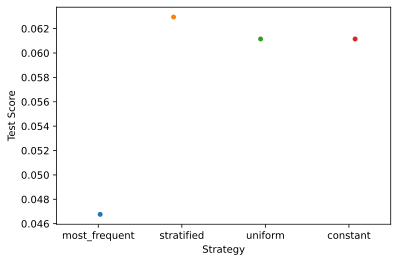

In [ ]:
warnings.simplefilter("ignore")
ax = sns.stripplot(strategies, test_scores);
ax.set(xlabel ='Strategy', ylabel ='Test Score')
plt.show()

From the plot above we see that the lower bound for the accuracy is around 5/6% depending on the chosen strategy:

> *Most frequent*: it classifies all the images with the label of the class with the highest frequency;

> *Stratified*: keeps into consideration the proportion of unbalanced classes;

> *Uniform*: applies a uniform distribution on the labels;

> Constant: all images are classified in a class of our choice, in our case 'Henri_Matisse'.

## CNN

We started implementing a Convolutional Neural Network increasing the complexity step by step starting from a naive LeNet up to a more complex ResNet.

As we previously suggested, we have decided to run the cross validation on each architecture in order to be able to compare their average accuracy and choose the best one. Unfortunately, due to time and resource management we were able to train the validatioin only on a very small number of epochs, while we incremented them when training on the augmented dataset to make predictions.

### LeNet

We have chosen the LeNet architecture as a starting point for our anaylis for its realtively simple structure.

In [ ]:
class LeNet(nn.Module):
  '''
    Convolutional Neural Network
  '''
  def __init__(self):
    super().__init__()
    self.layers = torch.nn.Sequential(
        nn.Conv2d(3, 6, kernel_size=5, padding=2), nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.Linear(14400, 120), nn.Sigmoid(),
        nn.Linear(120, 64), nn.Sigmoid(),
        nn.Linear(64, 18))

  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)


In [ ]:
X_1 = torch.rand(size=(1, 3, 128, 128))
for layer in LeNet().layers:
    X_1 = layer(X_1)
    print(layer.__class__.__name__,'output shape:\t', X_1.shape)

Conv2d output shape:	 torch.Size([1, 6, 128, 128])
Sigmoid output shape:	 torch.Size([1, 6, 128, 128])
AvgPool2d output shape:	 torch.Size([1, 6, 64, 64])
Conv2d output shape:	 torch.Size([1, 16, 60, 60])
Sigmoid output shape:	 torch.Size([1, 16, 60, 60])
AvgPool2d output shape:	 torch.Size([1, 16, 30, 30])
Flatten output shape:	 torch.Size([1, 14400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 64])
Sigmoid output shape:	 torch.Size([1, 64])
Linear output shape:	 torch.Size([1, 18])


In [ ]:
Cross_Validation(net = LeNet())

--------------------------------
FOLD 0
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 0: 5 %
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 1: 6 %
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 2: 4 %
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 3: 4 %
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 4: 4 %
--------------------------------
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
-----------------------

The average of the accuracy computed for each fold results in a value very close to the one we obtained with the Dummy Classifier, suggesting that this architecture is too simple for this task.

Hence, we decide not to go on modifying this model but to increase the complexity of the architecture moving to the GoogleNet.

### GoogLeNet

To implement a GoogLeNet,first, we must define the Inception block, composed of four different convolutions that work in parallel, which is the core of the whole architecture. 

In [ ]:
class Inception(nn.Module):
    def __init__(self, in_channels, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        self.p1_1 = nn.Conv2d(in_channels, c1, kernel_size=1)
        self.p2_1 = nn.Conv2d(in_channels, c2[0], kernel_size=1)
        self.p2_2 = nn.Conv2d(c2[0], c2[1], kernel_size=3, padding=1)
        self.p3_1 = nn.Conv2d(in_channels, c3[0], kernel_size=1)
        self.p3_2 = nn.Conv2d(c3[0], c3[1], kernel_size=5, padding=2)
        self.p4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.p4_2 = nn.Conv2d(in_channels, c4, kernel_size=1)

    def forward(self, x):
        p1 = F.relu(self.p1_1(x))
        p2 = F.relu(self.p2_2(F.relu(self.p2_1(x))))
        p3 = F.relu(self.p3_2(F.relu(self.p3_1(x))))
        p4 = F.relu(self.p4_2(self.p4_1(x)))
        return torch.cat((p1, p2, p3, p4), dim=1)

Then we compose the building blocks which will make the creation of the actual network much more easy and visually compact, and we move on creating the class of the final nerual network.

In [ ]:
b1 = nn.Sequential(nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
b2 = nn.Sequential(nn.Conv2d(64, 64, kernel_size=1),
                   nn.ReLU(),
                   nn.Conv2d(64, 192, kernel_size=3, padding=1),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
b3 = nn.Sequential(Inception(192, 64, (96, 128), (16, 32), 32),
                   Inception(256, 128, (128, 192), (32, 96), 64),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
b4 = nn.Sequential(Inception(480, 192, (96, 208), (16, 48), 64),
                   Inception(512, 160, (112, 224), (24, 64), 64),
                   Inception(512, 128, (128, 256), (24, 64), 64),
                   Inception(512, 112, (144, 288), (32, 64), 64),
                   Inception(528, 256, (160, 320), (32, 128), 128),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
b5 = nn.Sequential(Inception(832, 256, (160, 320), (32, 128), 128),
                   Inception(832, 384, (192, 384), (48, 128), 128),
                   nn.AdaptiveAvgPool2d((1,1)),
                   nn.Flatten())

In [ ]:
class GoogleNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(b1, b2, b3, b4, b5, nn.Linear(1024, 18))

  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

In [ ]:
Cross_Validation(net = GoogleNet())

--------------------------------
FOLD 0
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 0: 12 %
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 1: 10 %
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 2: 11 %
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 3: 11 %
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 4: 11 %
--------------------------------
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
------------------

From the result above we notice that we doubled the accuracy of the LeNet but we still got a very low result.

In the chunk below, we tried to change some Max Pooling with Average pooling in order to extract different information from each block, in this way we are not retaining only the information regarding the maximum of the weights in the kernel but also the average.


In [ ]:
b1 = nn.Sequential(nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
                   nn.ReLU(),
                   nn.AvgPool2d(kernel_size=3, stride=2, padding=1))  # Average Pooling
b2 = nn.Sequential(nn.Conv2d(64, 64, kernel_size=1),
                   nn.ReLU(),
                   nn.Conv2d(64, 192, kernel_size=3, padding=1),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
b3 = nn.Sequential(Inception(192, 64, (96, 128), (16, 32), 32),
                   Inception(256, 128, (128, 192), (32, 96), 64),
                   nn.AvgPool2d(kernel_size=3, stride=2, padding=1))  # Average Pooling
b4 = nn.Sequential(Inception(480, 192, (96, 208), (16, 48), 64),
                   Inception(512, 160, (112, 224), (24, 64), 64),
                   Inception(512, 128, (128, 256), (24, 64), 64),
                   Inception(512, 112, (144, 288), (32, 64), 64),
                   Inception(528, 256, (160, 320), (32, 128), 128),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
b5 = nn.Sequential(Inception(832, 256, (160, 320), (32, 128), 128),
                   Inception(832, 384, (192, 384), (48, 128), 128),
                   nn.AdaptiveAvgPool2d((1,1)),
                   nn.Flatten())

In [ ]:
class GoogleNet_2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(b1, b2, b3,nn.BatchNorm2d(480), b4, nn.Dropout(.5) ,b5, nn.Linear(1024, 18))

  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

In [ ]:
X_1 = torch.rand(size=(1, 3, 128, 128))
for layer in GoogleNet_2().layers:
    X_1 = layer(X_1)
    print(layer.__class__.__name__,'output shape:\t', X_1.shape)

Sequential output shape:	 torch.Size([1, 64, 32, 32])
Sequential output shape:	 torch.Size([1, 192, 16, 16])
Sequential output shape:	 torch.Size([1, 480, 8, 8])
BatchNorm2d output shape:	 torch.Size([1, 480, 8, 8])
Sequential output shape:	 torch.Size([1, 832, 4, 4])
Dropout output shape:	 torch.Size([1, 832, 4, 4])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 18])


In [ ]:
Cross_Validation(net = GoogleNet_2())

--------------------------------
FOLD 0
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 0: 12 %
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 1: 16 %
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 2: 16 %
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 3: 12 %
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 4: 13 %
--------------------------------
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
------------------

With the alternating Pooling strategies we record a slight  improvemenet from the previous results while still still being stuck whith a very small accuracy.

Again, we decided to move on to a different CNN model to check if it is possible to increase the model performance by radically changing the structure of the network.

### ResNeXt

The main difference between the ResNet and the ResNeXt is that the latter aggregates sets of affine transformations into one block; in this way it takes into account not only the standard dimensiond (width and depth) but also the cardinality of the set of transformations.

The introduction of this third dimension allows to handle large inputs and improve the accuracy increasing not the depth but the cardinality, hence mantaining the complexity relatively small.

In [ ]:
class ResNeXtBlock(nn.Module):  
    """The ResNeXt block."""
    def __init__(self, num_channels, groups, bot_mul, use_1x1conv=False,
                 strides=1):
        super().__init__()
        bot_channels = int(round(num_channels * bot_mul))
        self.conv1 = nn.LazyConv2d(bot_channels, kernel_size=1, stride=1)
        self.conv2 = nn.LazyConv2d(bot_channels, kernel_size=3,
                                   stride=strides, padding=1,
                                   groups=bot_channels//groups)
        self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=1)
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()
        self.bn3 = nn.LazyBatchNorm2d()
        if use_1x1conv:
            self.conv4 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
            self.bn4 = nn.LazyBatchNorm2d()
        else:
            self.conv4 = None

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = F.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.bn4(self.conv4(X))
        return F.relu(Y + X)

In [ ]:
class ResNeXt_1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(ResNeXtBlock(3, 16, 8),
                                nn.Dropout(.5),
                                nn.Flatten(),
                                nn.Linear(49152,18))

  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

In [ ]:
X_2 = torch.rand(size=(1, 3, 128, 128))
for layer in ResNeXt_1().layers:
    X_2 = layer(X_2)
    print(layer.__class__.__name__,'output shape:\t', X_2.shape)

ResNeXtBlock output shape:	 torch.Size([1, 3, 128, 128])
Dropout output shape:	 torch.Size([1, 3, 128, 128])
Flatten output shape:	 torch.Size([1, 49152])
Linear output shape:	 torch.Size([1, 18])


In [ ]:
Cross_Validation(net = ResNeXt_1())

--------------------------------
FOLD 0
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 0: 26 %
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 1: 29 %
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 2: 28 %
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 3: 26 %
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 4: 29 %
--------------------------------
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
------------------

From what we can see above, with the ResNext we have a big jump in the accuracy and an increasing stability between different folds.

Starting from this result we tried to add a layer of batch normalization to see if we can further improve the performance by stabilizing and speeding up the training.

In [ ]:
class ResNeXt_2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        ResNeXtBlock(3, 16, 8),
        nn.BatchNorm2d(3), # Batch Normalization
        nn.Dropout(.5),
        nn.Flatten(),
        nn.Linear(49152,18))

  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

In [ ]:
X_2 = torch.rand(size=(1, 3, 128, 128))
for layer in ResNeXt_2().layers:
    X_2 = layer(X_2)
    print(layer.__class__.__name__,'output shape:\t', X_2.shape)

ResNeXtBlock output shape:	 torch.Size([1, 3, 128, 128])
BatchNorm2d output shape:	 torch.Size([1, 3, 128, 128])
Dropout output shape:	 torch.Size([1, 3, 128, 128])
Flatten output shape:	 torch.Size([1, 49152])
Linear output shape:	 torch.Size([1, 18])


In [ ]:
Cross_Validation(net = ResNeXt_2())

--------------------------------
FOLD 0
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 0: 29 %
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 1: 23 %
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 2: 29 %
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 3: 24 %
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 4: 28 %
--------------------------------
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
------------------

Unfortunately this time we got a worse result with respect to the previous one due to an higher instability across folds.

We decide to explore one final CNN architecture to model our data.

### ResNet18

We chose to experiment with the ResNet18, a specific class of ResNet, because it is able to identify more tha 100 object contained in images and therefore could be useful to retain the style of an artist.

In order to do so we need to initialise the buiding blocks of the ResNet family of networks. In particular we implement the Residual block which allows to skip connections, meaning to sum up the input of one layer to the output of another one.

In [ ]:
class Residual(nn.Module): 
    """The Residual block of ResNet."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1,
                                   stride=strides)
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [ ]:
class ResNet(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=18):
        super(ResNet, self).__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.b1())
        for i, b in enumerate(arch):
            self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
        self.net.add_module('last', nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            # nn.Dropout(.5),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l.init_cnn)

    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
      
    
    def block(self, num_residuals, num_channels, first_block=False):
        blk = []
        for i in range(num_residuals):
            if i == 0 and not first_block:
                blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
            else:
                blk.append(Residual(num_channels))
        return nn.Sequential(*blk)

In [ ]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=18):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

In [ ]:
net = nn.Sequential(ResNet18())
X_2 = torch.rand(size=(1, 3, 128, 128))
for layer in net:
    X_2 = layer(X_2)
    print(layer.__class__.__name__,'output shape:\t', X_2.shape)

ResNet18 output shape:	 torch.Size([1, 18])


In [ ]:
Cross_Validation(net = ResNet18())

--------------------------------
FOLD 0
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 0: 40 %
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 1: 39 %
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 2: 41 %
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 3: 39 %
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 4: 43 %
--------------------------------
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
------------------

With this specific model we see a relevant increase of the Average Accuracy, over 10 percentage points, which identifies the ResNet18 as the best CNN model upon which we are now going to train the full augmented dataset.

### Best Model

#### Hyperparameter tuning on the best model 

In [ ]:
best_cnn = ResNet18()

In this section we are going to study the impact of the batch size and learning rate parameters in the optimization process, in order to find the best combination of the two that guarantees the highest performance.



First, we try to tune the batch size fixing it at 64.

In [ ]:
batch_size = 64
TRAIN_PATH = '/content/DL_for_AI/images/train'
train_loader = get_train_loader(TRAIN_PATH, 
                                      batch_size = batch_size, 
                                      augment=True,
                                      random_seed=5,
                                      shuffle=True,
                                      show_sample=True,
                                      num_workers=4, 
                                      pin_memory=False)

train_dataset = get_train_loader(TRAIN_PATH, 
                                  batch_size = batch_size, 
                                  augment=None,
                                  random_seed=5,
                                  shuffle=True,
                                  show_sample=True,
                                  num_workers=4, 
                                  pin_memory=False,
                                  data_loader = False)

TEST_PATH = '/content/DL_for_AI/images/test'
test_loader = get_test_loader(TEST_PATH,
                              batch_size=batch_size,
                              shuffle=True,
                              num_workers=4,  
                              pin_memory=False)

In [ ]:
Cross_Validation(net = ResNet18(), batch = batch_size)

--------------------------------
FOLD 0
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 0: 42 %
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 1: 41 %
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 2: 42 %
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 3: 35 %
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 4: 42 %
--------------------------------
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
------------------

As  is possible to notice, increasing the batch size returns the same average accuracy but with an increased instability between batches. Given the absence of a relevant change in the metric we consider best to guardantee a stable accuracy between folds by setting the batch size back to 32.

In [ ]:
batch_size = 32
TRAIN_PATH = '/content/DL_for_AI/images/train'
train_loader = get_train_loader(TRAIN_PATH, 
                                      batch_size = batch_size, 
                                      augment=True,
                                      random_seed=5,
                                      shuffle=True,
                                      show_sample=True,
                                      num_workers=4, 
                                      pin_memory=False)

train_dataset = get_train_loader(TRAIN_PATH, 
                                  batch_size = batch_size, 
                                  augment=None,
                                  random_seed=5,
                                  shuffle=True,
                                  show_sample=True,
                                  num_workers=4, 
                                  pin_memory=False,
                                  data_loader = False)

TEST_PATH = '/content/DL_for_AI/images/test'
test_loader = get_test_loader(TEST_PATH,
                              batch_size=batch_size,
                              shuffle=True,
                              num_workers=4,  
                              pin_memory=False)

Then, we tune the learning rate trying to see if a slight increase of the value from 0.0001 to 0.0005 could be helpful in the training.

In [ ]:
Cross_Validation(net = ResNet18(), lr = 5e-4,batch = batch_size)

--------------------------------
FOLD 0
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 0: 31 %
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 1: 32 %
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 2: 35 %
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 3: 31 %
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 4: 35 %
--------------------------------
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
------------------

Since the accuracy registered an inverse variation with respect to the learning rate, we decide to test whether a decrease of the latter may have a favourable effect on the accuracy.

In [ ]:
Cross_Validation(net = ResNet18(), lr = 5e-5,batch = batch_size)

--------------------------------
FOLD 0
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 0: 41 %
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 1: 42 %
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 2: 41 %
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 3: 39 %
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 4: 40 %
--------------------------------
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
------------------

Given the result above we can conclude that keeping the learning rate set at 0.0001 is a good option and then we move on to the train of the model.

To sum up, through the hyperparameter tuning we identified the optimal values for the batch size and the learning rate. 

We decided not to modify the overall optimization algorithm and stick to the Adam method since in other contextes we extensively verified the preferability of this method over others, for example the stochastic gradient descent.

### Data Augmentation

In order to avoid overfitting problems and to improve the training of the CNN we make our dataset undergo several different augmentation such as: Horizontal Flip, Random Rotation, RandomResizedCrop, ... 

We did this to greatly increase the number and the type of image information we feed into our neural network in order to help it generalize in the best way possible.

In [ ]:
l = []
batch_size = 32
X = get_train_loader(data_dir = TRAIN_PATH,
                              batch_size = batch_size,
                              augment = 'aug_1',
                              random_seed=5,
                              shuffle=True,
                              show_sample=True,
                              num_workers=4, 
                              pin_memory=False,
                              data_loader = False)
l.append(X)
X = get_train_loader(data_dir = TRAIN_PATH,
                              batch_size = batch_size,
                              augment = 'aug_2',
                              random_seed=5,
                              shuffle=True,
                              show_sample=True,
                              num_workers=4, 
                              pin_memory=False,
                              data_loader = False)
l.append(X)
X = get_train_loader(data_dir = TRAIN_PATH,
                              batch_size = batch_size,
                              augment = 'aug_3',
                              random_seed=5,
                              shuffle=True,
                              show_sample=True,
                              num_workers=4, 
                              pin_memory=False,
                              data_loader = False)
l.append(X)
X = get_train_loader(data_dir = TRAIN_PATH,
                              batch_size = batch_size,
                              augment = 'aug_4',
                              random_seed=5,
                              shuffle=True,
                              show_sample=True,
                              num_workers=4, 
                              pin_memory=False,
                              data_loader = False)
l.append(X)
X = get_train_loader(data_dir = TRAIN_PATH,
                              batch_size = batch_size,
                              augment = 'aug_5',
                              random_seed=5,
                              shuffle=True,
                              show_sample=True,
                              num_workers=4, 
                              pin_memory=False,
                              data_loader = False)
l.append(X)
X = get_train_loader(data_dir = TRAIN_PATH,
                              batch_size = batch_size,
                              augment = 'aug_6',
                              random_seed=5,
                              shuffle=True,
                              show_sample=True,
                              num_workers=4, 
                              pin_memory=False,
                              data_loader = False)
l.append(X)
X = get_train_loader(data_dir = TRAIN_PATH,
                              batch_size = batch_size,
                              augment = 'aug_7',
                              random_seed=5,
                              shuffle=True,
                              show_sample=True,
                              num_workers=4, 
                              pin_memory=False,
                              data_loader = False)
l.append(X)

X = get_train_loader(data_dir = TRAIN_PATH,
                              batch_size = batch_size,
                              augment = True,
                              random_seed=5,
                              shuffle=True,
                              show_sample=True,
                              num_workers=4, 
                              pin_memory=False,
                              data_loader = False)
l.append(X)

In [ ]:
train_loader_full_augmented = torch.utils.data.ConcatDataset(l)
train_loader_augmented = torch.utils.data.DataLoader(dataset = train_loader_full_augmented,
                                                     batch_size=batch_size,
                                                     num_workers=4,
                                                     pin_memory=False)

Now that we have a new and larger DataLoader we can train train our model of choice.

### Training

In [ ]:
lr = 0.0001
num_epochs, batch_size = 20, 32
train(best_cnn, train_loader_augmented, test_loader, num_epochs, lr, device=d2l.try_gpu())

loss 0.218, train acc 0.936, test acc 0.622
696.0 examples/sec on cuda:0


In [ ]:
torch.save(best_cnn.state_dict(), '/content/drive/MyDrive/Deep Learning/resnet18_best_model.pth')

Regardelss the oscillatory behaviour, from the graph above, is possible to identify a clear trend both in the loss which is decreasing and in the accuracy (test and train) which are increasig. As a matter of fact the training model obtains an accuracy of around 62% which is rather good compared to the average one we obtained with the cross validation.

In order to have a better understanding of the ability of the network to correctly classify our images we summarise it with the help of some specific metrics.

### Prediction

We start by defining 2 functions to make prediction on the test dataset.

In [ ]:
def predict(net, test_loader):
    """Predict labels"""
    trues = []
    preds = []
    for X, y in test_loader:
      X, y = X.to(device = 'cuda'), y.to(device = 'cuda') 
      trues.append(y)
      preds.append(net(X).argmax(axis=1))
    return trues, preds

In [ ]:
def prediction_print(trues,preds, n=6):
      titles = ['True: '+ str(artists_dirs[int(true.item())]) + ' vs Pred: ' + str(artists_dirs[int(pred.item())]) for true, pred in zip(trues, preds)]
      for i in range(n):
        print(titles[i])
        plt.imshow(PIL.Image.fromarray(cv2.imread('./images/test'+ '/' + os.listdir('./images/test')[i])))
        plt.show()

In [ ]:
trues, preds = predict(best_cnn, test_loader)

Here we manage the output of the predict function, which is grouped in batches, in order to be able to compute the metrics using the *torchmetrics* library.

In [ ]:
tr = [None]*64*len(trues)
pr = [None]*64*len(trues)
l = 0
for i,j in zip(trues, preds):
  for k in range(len(i)):
    i = list(i)
    j = list(j)
    tr[l] = i[k].item()
    pr[l] = j[k].item()
    l += 1

In [ ]:
trues = torch.Tensor(tr[:699])
preds = torch.Tensor(pr[:699])

### Metrics

First of all we compute the confusion matrix.

In [ ]:
confmat = ConfusionMatrix(task="multiclass", num_classes=18)

In [ ]:
confusion_mat = confmat(preds,trues)
confusion_mat
# True Values -> Row
# Predicted Values -> Column

tensor([[18,  0,  2,  1,  3,  0,  1,  0,  0,  0,  0,  0,  2,  0,  1,  6,  1,  0],
        [ 4, 16,  0,  4,  0,  1,  0,  0,  1,  3,  0,  5,  0,  2,  1,  1,  0,  0],
        [ 2,  4, 14,  0,  0,  0,  1,  1,  0,  6,  0,  1,  2,  2,  3,  1,  3,  0],
        [ 1,  4,  3, 15,  1,  0,  3,  1,  3,  0,  1,  2,  1,  2,  0,  0,  0,  0],
        [ 3,  0,  0,  0, 16,  5,  0,  0,  0,  3,  0,  2,  7,  0,  0,  2,  1,  1],
        [ 1,  1,  0,  0,  0, 36,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0],
        [ 1,  0,  0,  1,  1,  4, 21,  1,  3,  2,  0,  0,  0,  0,  1,  1,  2,  1],
        [ 1,  0,  0,  0,  0,  0,  0, 28,  1,  5,  0,  0,  1,  0,  3,  0,  0,  1],
        [ 1,  0,  2,  0,  2,  1,  1,  3, 18,  2,  0,  0,  0,  0,  1,  2,  2,  5],
        [ 3,  1,  3,  0,  0,  0,  0,  2,  0, 25,  0,  0,  0,  0,  0,  0,  6,  0],
        [ 2,  0,  0,  1,  2,  0,  1,  1,  0,  0, 30,  0,  1,  0,  1,  0,  1,  0],
        [ 0,  2,  5,  0,  0,  0,  1,  0,  0,  2,  1, 24,  2,  0,  1,  0,  0,  0],
        [ 2,  2,

In [ ]:
good = 0
for i in range(18):
  good += confusion_mat[i][i].item()

In [ ]:
good/torch.sum(confusion_mat)

tensor(0.6223)

In [ ]:
matr = confusion_mat/torch.sum(confusion_mat)
matr = matr.tolist()

In [ ]:
df = pd.DataFrame(matr,columns=artists_dirs,index=artists_dirs)

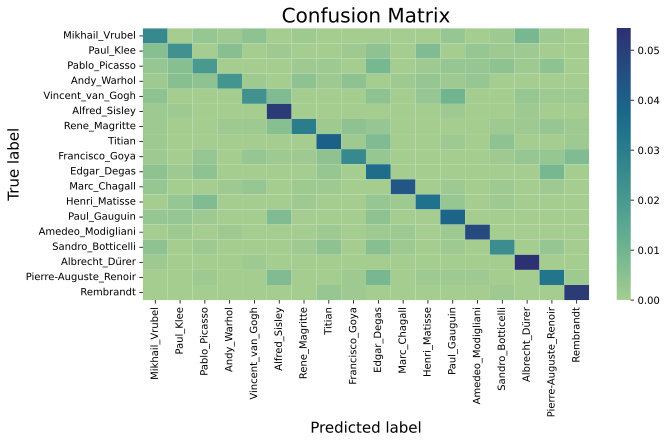

In [ ]:
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(df, annot=False, cmap="crest")
plt.title('Confusion Matrix', fontsize = 20) # title with fontsize 20
plt.ylabel('True label', fontsize = 15) # x-axis label with fontsize 15
plt.xlabel('Predicted label', fontsize = 15) # y-axis label with fontsize 15

plt.show()

From the confusion matrix we notice that the network is quite able to classiy all the authors regardeless making some distributed errors. 

Overall the ability of correctly classifying the paintings seems acceptable; still we perform other metrics to go more in depth in our analisys.

In [ ]:
# Accuracy
accuracy = torchmetrics.Accuracy(task="multiclass", average=None, num_classes=18)
accuracy(preds,trues)

tensor([0.5143, 0.4211, 0.3500, 0.4054, 0.4000, 0.9000, 0.5385, 0.7000, 0.4500,
        0.6250, 0.7500, 0.6316, 0.6750, 0.8462, 0.5152, 0.9500, 0.5750, 0.9000])

In the above chunk is possible to notice a big variation between the accuracies of each class; this trend is vaguely noticable in the confusion matrix looking at how some authors get mixed up more than others.

In [ ]:
# Precision Macro
precision_macro = torchmetrics.Precision(task="multiclass", average=None, num_classes=18)
precision_macro(preds,trues)

tensor([0.4186, 0.5161, 0.4375, 0.6522, 0.6154, 0.6316, 0.7000, 0.6512, 0.6429,
        0.4032, 0.8824, 0.6857, 0.5745, 0.8250, 0.5667, 0.7308, 0.5610, 0.8000])

In [ ]:
# Precision Micro
precision_micro = torchmetrics.Precision(task="multiclass", average=None, num_classes=18)
precision_micro(preds,trues)

tensor([0.4186, 0.5161, 0.4375, 0.6522, 0.6154, 0.6316, 0.7000, 0.6512, 0.6429,
        0.4032, 0.8824, 0.6857, 0.5745, 0.8250, 0.5667, 0.7308, 0.5610, 0.8000])

In [ ]:
# Recall Macro
recall_macro = torchmetrics.Recall(task="multiclass", average=None, num_classes=18)
recall_macro(preds,trues)

tensor([0.5143, 0.4211, 0.3500, 0.4054, 0.4000, 0.9000, 0.5385, 0.7000, 0.4500,
        0.6250, 0.7500, 0.6316, 0.6750, 0.8462, 0.5152, 0.9500, 0.5750, 0.9000])

In [ ]:
# Recall Micro
recall_micro = torchmetrics.Recall(task="multiclass", average=None, num_classes=18)
recall_micro(preds,trues)

tensor([0.5143, 0.4211, 0.3500, 0.4054, 0.4000, 0.9000, 0.5385, 0.7000, 0.4500,
        0.6250, 0.7500, 0.6316, 0.6750, 0.8462, 0.5152, 0.9500, 0.5750, 0.9000])

In [ ]:
# F1 Score
f1 = torchmetrics.classification.MulticlassF1Score(num_classes=18, average= None)
f1(preds,trues)

tensor([0.4615, 0.4638, 0.3889, 0.5000, 0.4848, 0.7423, 0.6087, 0.6747, 0.5294,
        0.4902, 0.8108, 0.6575, 0.6207, 0.8354, 0.5397, 0.8261, 0.5679, 0.8471])

In [ ]:
print('Classification Report')
print(classification_report(trues, preds, target_names = artists_dirs))

Classification Report
                       precision    recall  f1-score   support

       Mikhail_Vrubel       0.42      0.51      0.46        35
            Paul_Klee       0.52      0.42      0.46        38
        Pablo_Picasso       0.44      0.35      0.39        40
          Andy_Warhol       0.65      0.41      0.50        37
     Vincent_van_Gogh       0.62      0.40      0.48        40
        Alfred_Sisley       0.63      0.90      0.74        40
        Rene_Magritte       0.70      0.54      0.61        39
               Titian       0.65      0.70      0.67        40
       Francisco_Goya       0.64      0.45      0.53        40
          Edgar_Degas       0.40      0.62      0.49        40
         Marc_Chagall       0.88      0.75      0.81        40
        Henri_Matisse       0.69      0.63      0.66        38
         Paul_Gauguin       0.57      0.68      0.62        40
    Amedeo_Modigliani       0.82      0.85      0.84        39
    Sandro_Botticelli       0.57

As we have seen in the accuracies also in all these metrics the variation is very large; this may be justified by the overlap of styles and subjects in the paintings that can make the classification harder for the network.

## GAN

After having analyzed possible model in the CNN class we try a different method that we expect to retain more information from the images.

We train a Genartive Adversarial Model to be able to generate truthfull images starting from our original dataset. In particular the GAN is a min max model that is composed of two symmetrical halfs: the generator creates images with an increasing level of precision, the discriminator takes as inputs those images along with true ones and learns to distinguish one from the other. These two networks learn from one another frist minimising the loss and then maximising it.

Our aim is to obtain a GAN model with a discrete level of accuracy in order to adapt the discriminator network in the specific context of our multiclass discrimination using the specific weights deduced from training the whole GAN model.

For the following model we initialize specific parameters to allow an easier parameter tuning.

In [ ]:
# Number of workers for dataloader
workers = 4 
# Number of channels in the training images. For color images this is 3
nc = 3
# Size of z latent vector (i.e. size of generator input)
nz = 100
# Size of feature maps in generator
n_G = 64
# Size of feature maps in discriminator
n_D = 64
# Number of training epochs
num_epochs = 2
# Learning rate for optimizers
lr = 0.0001
# Beta1 hyperparam for Adam optimizers
beta1 = 0.5
# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1
# device
device = 'cuda'

Then we define a function to initialize weights.

In [ ]:
# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

Below we define the G-Blocks and the Generator part of the network.

In [ ]:
class G_block(nn.Module):
    def __init__(self, out_channels, in_channels=3, kernel_size=4, strides=2,
                 padding=1, **kwargs):
        super(G_block, self).__init__(**kwargs)
        self.conv2d_trans = nn.ConvTranspose2d(in_channels, out_channels,
                                kernel_size, strides, padding, bias=False)
        self.batch_norm = nn.BatchNorm2d(out_channels)
        self.activation = nn.ReLU()

    def forward(self, X):
        return self.activation(self.batch_norm(self.conv2d_trans(X)))

In [ ]:
class Generator_2(nn.Module):
    def __init__(self, ngpu):
        super(Generator_2, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
    G_block(in_channels=100, out_channels=n_G*16,
            strides=1, padding=0),
    #G_block(in_channels=n_G*32, out_channels =n_G*16),
    G_block(in_channels=n_G*16, out_channels=n_G*8), 
    G_block(in_channels=n_G*8, out_channels=n_G*4), # Output: (64 * 4, 8, 8)
    G_block(in_channels=n_G*4, out_channels=n_G*2), # Output: (64 * 2, 16, 16)
    G_block(in_channels=n_G*2, out_channels=n_G),   # Output: (64, 32, 32)
    nn.ConvTranspose2d(in_channels=n_G, out_channels=3,
                       kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh())

    def forward(self, input):
        return self.main(input)

In [ ]:
netG = Generator_2(ngpu).to(device)
netG.apply(reset_weights)  

print(netG)
X_2 = torch.rand(size=(1, 100, 1, 1))
for layer in Generator_2(ngpu).main:
    X_2 = layer(X_2)
    print(layer.__class__.__name__,'output shape:\t', X_2.shape)

Generator_2(
  (main): Sequential(
    (0): G_block(
      (conv2d_trans): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (batch_norm): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): ReLU()
    )
    (1): G_block(
      (conv2d_trans): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (batch_norm): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): ReLU()
    )
    (2): G_block(
      (conv2d_trans): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (batch_norm): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): ReLU()
    )
    (3): G_block(
      (conv2d_trans): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (batch_norm): BatchNorm2d(128, eps=1e-05, momentum=0.1

Here we implement the D-Block and the Discriminator part of the GAN

In [ ]:
class D_block(nn.Module):
    def __init__(self, out_channels, in_channels=3, kernel_size= 4, strides=2,
                padding=1, alpha=0.2, **kwargs):
        super(D_block, self).__init__(**kwargs)
        self.conv2d = nn.Conv2d(in_channels, out_channels, kernel_size,
                                strides, padding, bias=False)
        self.batch_norm = nn.BatchNorm2d(out_channels)
        self.activation = nn.LeakyReLU(alpha, inplace=True)

    def forward(self, X):
        return self.activation(self.batch_norm(self.conv2d(X)))

In [ ]:
class Discriminator_1(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator_1, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
    D_block(n_D),  # Output: (256, 128, 128)
    D_block(in_channels=n_D, out_channels=n_D*2),  # Output: (256 * 2, 64, 64)
    D_block(in_channels=n_D*2, out_channels=n_D*4),  # Output: (256 * 4, 32, 32)
    D_block(in_channels=n_D*4, out_channels=n_D*8),  # Output: (256 * 8, 16, 16)
    D_block(in_channels=n_D*8, out_channels=n_D*16), # Output: (256 * 16, 8, 8)
    #D_block(in_channels=n_D*16, out_channels=n_D*32), # Output: (256 * 32, 4, 4)
    nn.Conv2d(in_channels=n_D*16, out_channels=1, kernel_size = 4,
              bias=False),
    nn.Sigmoid())

    def forward(self, input):
        return self.main(input)

In [ ]:
net = nn.Sequential(Discriminator_1(ngpu = 1))
X_2 = torch.rand(size=(1, 3, 128, 128))
for layer in Discriminator_1(ngpu = 1).main:
    X_2 = layer(X_2)
    print(layer.__class__.__name__,'output shape:\t', X_2.shape)

D_block output shape:	 torch.Size([1, 64, 64, 64])
D_block output shape:	 torch.Size([1, 128, 32, 32])
D_block output shape:	 torch.Size([1, 256, 16, 16])
D_block output shape:	 torch.Size([1, 512, 8, 8])
D_block output shape:	 torch.Size([1, 1024, 4, 4])
Conv2d output shape:	 torch.Size([1, 1, 1, 1])
Sigmoid output shape:	 torch.Size([1, 1, 1, 1])


In [ ]:
netD = Discriminator_1(ngpu).to(device)
netD.apply(reset_weights)
print(netD)

Discriminator_1(
  (main): Sequential(
    (0): D_block(
      (conv2d): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (batch_norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (1): D_block(
      (conv2d): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (batch_norm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (2): D_block(
      (conv2d): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (batch_norm): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (3): D_block(
      (conv2d): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=Fals

Then we initialize the two specific optimizer for the discriminator and generator and the loss function.



In [ ]:
criterion = nn.BCELoss()
fixed_noised = torch.randn(128, nz, 1, 1, device=device)
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

And then we adapt our train function for GAN purposes, making it able to deal with two interconnected neural network at once.

In [ ]:
# Training Loop
def train_GAN(netD,netG,
              num_epoch = num_epochs,
              dataloader = train_loader,
              device = device,
              real_label = 1,
              fake_label = 0,
              fixed_noise = fixed_noised):
    img_list = []
    G_losses = []
    D_losses = []
    iters = 0
    saveidx = 0
    print("Starting Training Loop...")
    # For each epoch
    for epoch in range(num_epoch):
        # For each batch in the dataloader
        for i, data in enumerate(dataloader, 0):

            ############################
            # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
            ###########################
            ## Train with all-real batch
            netD.zero_grad()
            # Format batch
            real_cpu = data[0].to(device)
            b_size = real_cpu.size(0)
            label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
            # Forward pass real batch through D
            output = netD(real_cpu).view(-1)
            # Calculate loss on all-real batch
            errD_real = criterion(output, label)
            # Calculate gradients for D in backward pass
            errD_real.backward()
            D_x = output.mean().item()

            ## Train with all-fake batch
            # Generate batch of latent vectors
            noise = torch.randn(b_size, nz, 1, 1, device=device)
            # Generate fake image batch with G
            fake = netG(noise)
            label.fill_(fake_label)
            # Classify all fake batch with D
            output = netD(fake.detach()).view(-1)
            # Calculate D's loss on the all-fake batch
            errD_fake = criterion(output, label)
            # Calculate the gradients for this batch, accumulated (summed) with previous gradients
            errD_fake.backward()
            D_G_z1 = output.mean().item()
            # Compute error of D as sum over the fake and the real batches
            errD = errD_real + errD_fake
            # Update D
            optimizerD.step()

            ############################
            # (2) Update G network: maximize log(D(G(z)))
            ###########################
            netG.zero_grad()
            label.fill_(real_label)
            # Since we just updated D, perform another forward pass of all-fake batch through D
            output = netD(fake).view(-1)
            # Calculate G's loss based on this output
            errG = criterion(output, label)
            # Calculate gradients for G
            errG.backward()
            D_G_z2 = output.mean().item()
            # Update G
            optimizerG.step()

            # Output training stats
            if i % 50 == 0:
                print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                      % (epoch, num_epoch, i, len(dataloader),
                        errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
                
            # Save Losses for plotting later
            G_losses.append(errG.item())
            D_losses.append(errD.item())

            # Check how the generator is doing by saving G's output on fixed_noise
            if (iters % 50 == 0) or ((epoch == num_epoch-1) and (i == len(dataloader)-1)):
                with torch.no_grad():
                    fake = netG(fixed_noise).detach().cpu()
                img_list.append(vutils.make_grid(fake, padding=2, normalize=True))
            iters += 1

        if (epoch + 1) % 50 == 0:
              torch.save(netD.state_dict(), '/content/drive/MyDrive/Deep Learning/discr_weight' + str(saveidx) +'.pth')
              print('checkpoint saved')
              saveidx += 1
    return netD, G_losses, D_losses, img_list

Here we train the GAN model over a big number of epochs in order to run the traning only once and save the weights only once.

In [ ]:
netD, G_losses, D_losses, img_list = train_GAN(netD, netG, num_epoch = 500)

Starting Training Loop...
[0/500][0/87]	Loss_D: 0.4534	Loss_G: 14.5666	D(x): 0.9996	D(G(z)): 0.2574 / 0.0000
[0/500][50/87]	Loss_D: 0.2070	Loss_G: 10.2226	D(x): 0.9095	D(G(z)): 0.0676 / 0.0007
[1/500][0/87]	Loss_D: 0.9090	Loss_G: 4.8322	D(x): 0.5918	D(G(z)): 0.0012 / 0.0796
[1/500][50/87]	Loss_D: 0.5328	Loss_G: 12.8832	D(x): 0.9885	D(G(z)): 0.2635 / 0.0000
[2/500][0/87]	Loss_D: 0.0970	Loss_G: 7.2426	D(x): 0.9996	D(G(z)): 0.0742 / 0.0030
[2/500][50/87]	Loss_D: 0.1722	Loss_G: 10.3506	D(x): 0.9930	D(G(z)): 0.1336 / 0.0001
[3/500][0/87]	Loss_D: 0.1569	Loss_G: 9.1749	D(x): 0.9998	D(G(z)): 0.1238 / 0.0004
[3/500][50/87]	Loss_D: 0.0682	Loss_G: 5.7919	D(x): 0.9771	D(G(z)): 0.0408 / 0.0106
[4/500][0/87]	Loss_D: 0.0578	Loss_G: 8.1061	D(x): 0.9988	D(G(z)): 0.0517 / 0.0011
[4/500][50/87]	Loss_D: 0.5051	Loss_G: 9.1172	D(x): 0.9024	D(G(z)): 0.0978 / 0.0021
[5/500][0/87]	Loss_D: 0.0121	Loss_G: 8.1227	D(x): 0.9977	D(G(z)): 0.0093 / 0.0021
[5/500][50/87]	Loss_D: 0.0952	Loss_G: 6.1230	D(x): 0.9558	D(G(z

RuntimeError: ignored

In [ ]:
torch.save(netD.state_dict(), '/content/drive/MyDrive/Deep Learning/discr_weight_FINAL.pth')

In [ ]:
netD_plot, G_losses, D_losses, img_list = train_GAN(netD, netG, num_epoch = 150)

Starting Training Loop...
[0/150][0/87]	Loss_D: 1.3711	Loss_G: 4.3514	D(x): 0.4603	D(G(z)): 0.4345 / 0.0136
[0/150][50/87]	Loss_D: 2.1865	Loss_G: 15.0684	D(x): 0.8212	D(G(z)): 0.8375 / 0.0000
[1/150][0/87]	Loss_D: 0.3667	Loss_G: 18.2908	D(x): 0.7554	D(G(z)): 0.0000 / 0.0000
[1/150][50/87]	Loss_D: 0.4497	Loss_G: 11.9750	D(x): 0.6958	D(G(z)): 0.0001 / 0.0000
[2/150][0/87]	Loss_D: 0.0393	Loss_G: 6.1072	D(x): 0.9913	D(G(z)): 0.0300 / 0.0024
[2/150][50/87]	Loss_D: 0.1325	Loss_G: 4.2828	D(x): 0.8908	D(G(z)): 0.0139 / 0.0151
[3/150][0/87]	Loss_D: 0.0156	Loss_G: 6.2141	D(x): 0.9962	D(G(z)): 0.0117 / 0.0021
[3/150][50/87]	Loss_D: 0.1069	Loss_G: 4.2650	D(x): 0.9136	D(G(z)): 0.0074 / 0.0157
[4/150][0/87]	Loss_D: 0.0143	Loss_G: 6.2415	D(x): 0.9958	D(G(z)): 0.0099 / 0.0020
[4/150][50/87]	Loss_D: 0.0538	Loss_G: 4.8596	D(x): 0.9517	D(G(z)): 0.0031 / 0.0079
[5/150][0/87]	Loss_D: 0.0044	Loss_G: 6.6342	D(x): 0.9989	D(G(z)): 0.0033 / 0.0013
[5/150][50/87]	Loss_D: 0.0186	Loss_G: 6.3188	D(x): 0.9835	D(G(z)

In the following we implement a graphical representation of the learning process of the GAN model and a final overview of the quality of the images compared to the true ones.

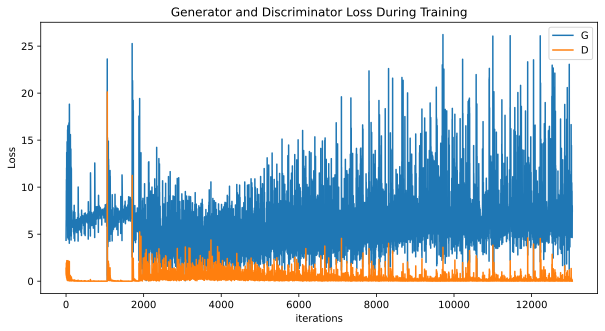

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

The graph above displayes the trend of the two losses, the blue one is the Generator loss while the orange is the Discriminator's.

 We notice two very noisy behaviours which are actually in line with the theory of the Generative Adversarial models; as a matter of fact behind this noise is clearly visible an increasing general trand for the Generator loss and a slightly less visible decreasing trend for the Discriminator.

This confirms the fact that the competition of the two networks allows them to learn and improve their tasks, creating a rather good Generator network and an equally capable Discriminator one.

This is particularly visible in the following display of images, where on the right is the selection of pictures genrated by the network while on the left the original one used as inputs for the algorithm.

In [ ]:
real_batch = next(iter(train_loader))

# Plot the real images
plt.figure(figsize=(15,25))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:128], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()

### Discriminator 

In the following section we are isolating the Discriminator algorithm in order to implement it in a multiclass classification problem. We do this by mantaining frozen the first layers (those inherited from the GAN implementation) and the relative weights, while training the additional ones.

In [ ]:
class Master_Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Master_Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
    D_block(n_D),  
    D_block(in_channels=n_D, out_channels=n_D*2),  
    D_block(in_channels=n_D*2, out_channels=n_D*4),  
    D_block(in_channels=n_D*4, out_channels=n_D*8),  
    D_block(in_channels=n_D*8, out_channels=n_D*16)) 
        self.conv = nn.Sequential(nn.Conv2d(in_channels=n_D*16, out_channels=n_D*32, kernel_size = 1,
              bias=False))
        self.dense = nn.Sequential(nn.ReLU(),
                                   nn.ConvTranspose2d(in_channels = n_D*32, out_channels = n_D*16, kernel_size = 2),
                                   nn.BatchNorm2d(n_D*16), 
                                   torch.nn.ReLU(),
                                   torch.nn.MaxPool2d(kernel_size = 2),
                                   nn.Conv2d(in_channels=n_D*16,out_channels=n_D*8, kernel_size = 1),
                                   nn.Dropout(0.5),
                                   nn.BatchNorm2d(n_D*8),
                                   nn.Flatten(),
                                   nn.Linear(2048,18),
                                   )

    def forward(self, input):
        mid = self.main(input)
        mid_2 = self.conv(mid)
        out = self.dense(mid_2)
        return out

First we composed the Master_Discriminator by adding two convolutional layers separated by several additional layers that are ment to capture as many information as possible to make the best prediction.

In [ ]:
gan_net = Master_Discriminator(1)

The following chunk initializes the saved weights from the GAN for the fist block of layers, called *main*, and flags them as non-trianable for the later trainig. For this specific reason we also have to costumize the train and cross validation functions in order to adapt them to this specific network with only two trainable blocks. 

In [ ]:
def prepare(model):
  gan_net = model
  netD.load_state_dict(torch.load('/content/drive/MyDrive/Deep Learning/discr_weight5.pth'))

  weig = []
  for i in netD.parameters():
    weig.append(i)

  w = []
  for i in gan_net.main.parameters():
    w.append(i)

  w_c = []
  for i in gan_net.conv.parameters():
    w_c.append(i)

  with torch.no_grad():
    i=0
    for param in gan_net.main.parameters():
        param.data = weig[i].data.float()
        i+=1

  for param in gan_net.main.parameters():
    param.requires_grad = False
  for param in gan_net.main.parameters():
    print(param.requires_grad)
  for param in gan_net.conv.parameters():
    print(param.requires_grad)
  
  return gan_net

In [ ]:
def train_Discrim(net, train_iter, test_iter, num_epochs, lr,
              device = d2l.try_gpu()):
    """Train a model with a GPU"""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight) 
    net.conv.apply(reset_weights)
    net.dense.apply(reset_weights)
    print('training on', device)

    net.to(device) 
    optimizer = torch.optim.Adam(net.parameters(), lr=lr, betas=(0.9, 0.999))
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim = [0,2],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)
    for epoch in range(num_epochs):
        metric = d2l.Accumulator(3)
        net.train()

        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad(): 
                metric.add(l * X.shape[0], accuracy(y_hat, y) , X.shape[0])
            timer.stop()
            
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

In [ ]:
def Cross_Validation_Discrim(net, data = train_dataset, folds = 5, epochs = 2, loss = nn.CrossEntropyLoss(), lr = lr, batch = 32, seed = 78):
  # Configuration options
  k_folds = folds
  num_epochs = epochs
  loss_function = loss
  batch_size = batch
  # For fold results
  results = {}
  # Set fixed random number seed
  torch.manual_seed(seed)
  # Prepare dataset.
  dataset = data
  # Define the K-fold Cross Validator
  kfold = KFold(n_splits=k_folds, shuffle=True)
  # Start print
  print('--------------------------------')
  # K-fold Cross Validation model evaluation
  for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    # Define data loaders for training and testing data in this fold
    testloader = torch.utils.data.DataLoader(dataset,batch_size=batch_size, sampler=test_subsampler)
    trainloader = torch.utils.data.DataLoader(dataset,batch_size=batch_size, sampler=train_subsampler)
    # Init the neural network
    network = net.to('cuda')
    net.conv.apply(reset_weights)
    net.dense.apply(reset_weights)    
    # Initialize optimizer
    optimizer = torch.optim.Adam(network.parameters(), lr=lr)
    # Run the training loop for defined number of epochs
    for epoch in range(0, num_epochs):
      # Print epoch
      print(f'Starting epoch {epoch+1}')
      # Set current loss value
      current_loss = 0.0
      # Iterate over the DataLoader for training data
      for i, data in enumerate(trainloader, 0):
        # Get inputs
        inputs, targets = data
        inputs, targets = inputs.to('cuda'), targets.to('cuda')
        # Zero the gradients
        optimizer.zero_grad()
        # Perform forward pass
        outputs = network(inputs)
        outputs = outputs.to('cuda')
        # Compute loss
        loss = loss_function(outputs, targets)
        # Perform backward pass
        loss.backward()
        # Perform optimization
        optimizer.step()
        # Print statistics
        current_loss += loss.item()
        if i % 500 == 499:
            print('Loss after mini-batch %5d: %.3f' %
                  (i + 1, current_loss / 500))
            current_loss = 0.0
    print('Training process has finished.')
    print('Starting testing')
    # Evaluation for this fold
    correct, total = 0, 0
    with torch.no_grad():
      # Iterate over the test data and generate predictions
      for i, data in enumerate(testloader, 0):
        # Get inputs
        inputs, targets = data
        inputs, targets = inputs.to('cuda'), targets.to('cuda')
        # Generate outputs
        outputs = network(inputs)
        outputs = outputs.to('cuda')
        # Set total and correct
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
      print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
      print('--------------------------------')
      results[fold] = 100.0 * (correct / total)
  print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
  print('--------------------------------')
  sum = 0.0
  for key, value in results.items():
    print(f'Fold {key}: {value} %')
    sum += value
  print(f'Average: {sum/len(results.items())} %')

In [ ]:
X_3 = torch.rand(size=(1, 3, 128, 128))
X_3 = X_3
for layer in gan_net.main:
    X_3 = layer(X_3)
    print(layer.__class__.__name__,'output shape:\t', X_3.shape)

D_block output shape:	 torch.Size([1, 64, 64, 64])
D_block output shape:	 torch.Size([1, 128, 32, 32])
D_block output shape:	 torch.Size([1, 256, 16, 16])
D_block output shape:	 torch.Size([1, 512, 8, 8])
D_block output shape:	 torch.Size([1, 1024, 4, 4])


In [ ]:
X_5 = torch.rand(size=(1, 1024, 4, 4))
for layer in gan_net.conv:
  X_5 = layer(X_5)
  print(layer.__class__.__name__,'output shape:\t',X_5.shape)

Conv2d output shape:	 torch.Size([1, 2048, 4, 4])


In [ ]:
X_4 = torch.rand(size=(1, 2048, 4, 4))
X_4 = X_4
for layer in gan_net.dense:
    X_4 = layer(X_4)
    print(layer.__class__.__name__,'output shape:\t', X_4.shape)

ReLU output shape:	 torch.Size([1, 2048, 4, 4])
ConvTranspose2d output shape:	 torch.Size([1, 1024, 5, 5])
BatchNorm2d output shape:	 torch.Size([1, 1024, 5, 5])
ReLU output shape:	 torch.Size([1, 1024, 5, 5])
MaxPool2d output shape:	 torch.Size([1, 1024, 2, 2])
Conv2d output shape:	 torch.Size([1, 512, 2, 2])
Dropout output shape:	 torch.Size([1, 512, 2, 2])
BatchNorm2d output shape:	 torch.Size([1, 512, 2, 2])
Flatten output shape:	 torch.Size([1, 2048])
Linear output shape:	 torch.Size([1, 18])


In [ ]:
Cross_Validation_Discrim(prepare(Master_Discriminator(1)))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
--------------------------------
FOLD 0
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 0: 47 %
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 1: 52 %
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 2: 50 %
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 3: 50 %
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 4: 49 %


Compared to the CNN model we notice that the average accuracy is close to the one we obtained with the best CNN model in the cross validation part. In addition this method seems to have more stability between folds, probably due to the fact that around half of the weights are not trainable and hance constant between folds.

Now we try to test if an additional convolutional layer followed by a RelU activation function allows for more characterization of the weights and hence a better accuracy.

In [ ]:
class Master_Discriminator_2(nn.Module):
    def __init__(self, ngpu):
        super(Master_Discriminator_2, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
    D_block(n_D),  
    D_block(in_channels=n_D, out_channels=n_D*2),
    D_block(in_channels=n_D*2, out_channels=n_D*4), 
    D_block(in_channels=n_D*4, out_channels=n_D*8), 
    D_block(in_channels=n_D*8, out_channels=n_D*16))
        self.conv = nn.Sequential(nn.Conv2d(in_channels=n_D*16, out_channels=n_D*32, kernel_size = 1,
              bias=False))
        self.dense = nn.Sequential(nn.ReLU(),
                                   nn.ConvTranspose2d(in_channels = n_D*32, out_channels = n_D*16, kernel_size = 2),
                                   nn.BatchNorm2d(n_D*16), 
                                   torch.nn.ReLU(),
                                   nn.Conv2d(in_channels=n_D*16,out_channels=n_D*8, kernel_size = 1), # Convolutional Layer
                                   torch.nn.MaxPool2d(kernel_size = 2),
                                   torch.nn.ReLU(), # ReLU
                                   nn.Conv2d(in_channels=n_D*8,out_channels=n_D*4, kernel_size = 1),
                                   nn.Dropout(0.5),
                                   nn.BatchNorm2d(n_D*4),
                                   nn.Flatten(),
                                   nn.Linear(1024,18),
                                  )

    def forward(self, input):
        mid = self.main(input)
        mid_2 = self.conv(mid)
        out = self.dense(mid_2)
        return out

In [ ]:
Cross_Validation_Discrim(prepare(Master_Discriminator_2(1)))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
--------------------------------
FOLD 0
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 0: 47 %
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 1: 50 %
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 2: 52 %
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 3: 50 %
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 4: 48 %


We actually don't see any improvement after this change, suggesting us to increment the number of modifications we apply to the network or to change the type of information we extrapolate. For this reason we try inserting an average pooling at the end of the network to see if we register any improvement.

In [ ]:
class Master_Discriminator_3(nn.Module):
    def __init__(self, ngpu):
        super(Master_Discriminator_3, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
    D_block(n_D),  # Output: (256, 128, 128)
    D_block(in_channels=n_D, out_channels=n_D*2),  # Output: (256 * 2, 64, 64)
    D_block(in_channels=n_D*2, out_channels=n_D*4),  # Output: (256 * 4, 32, 32)
    D_block(in_channels=n_D*4, out_channels=n_D*8),  # Output: (256 * 8, 16, 16)
    D_block(in_channels=n_D*8, out_channels=n_D*16)) # Output: (256 * 16, 8, 8))
        self.conv = nn.Sequential(nn.Conv2d(in_channels=n_D*16, out_channels=n_D*32, kernel_size = 1,
              bias=False))
        self.dense = nn.Sequential(nn.ReLU(),
                                   nn.ConvTranspose2d(in_channels = n_D*32, out_channels = n_D*16, kernel_size = 2),
                                   nn.BatchNorm2d(n_D*16), 
                                   torch.nn.ReLU(),
                                   nn.Conv2d(in_channels=n_D*16,out_channels=n_D*8, kernel_size = 1),
                                   torch.nn.MaxPool2d(kernel_size = 2),
                                   torch.nn.ReLU(),
                                   nn.Conv2d(in_channels=n_D*8,out_channels=n_D*4, kernel_size = 1),
                                   nn.AdaptiveAvgPool2d(4), # Average Pooling
                                   nn.BatchNorm2d(n_D*4),
                                   nn.Flatten(),
                                   nn.Linear(4096,18),
                                  )

    def forward(self, input):
        mid = self.main(input)
        mid_2 = self.conv(mid)
        out = self.dense(mid_2)
        return out

In [ ]:
Cross_Validation_Discrim(prepare(Master_Discriminator_3(1)))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
--------------------------------
FOLD 0
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 0: 52 %
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 1: 51 %
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 2: 50 %
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 3: 53 %
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 4: 54 %


Given the slight increase of the average accuracy after the insertion of the new layer we try to add also a dropout in order to make the model more robust by adding noise to internal layers.

In [ ]:
class Master_Discriminator_4(nn.Module):
    def __init__(self, ngpu):
        super(Master_Discriminator_4, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
    D_block(n_D), 
    D_block(in_channels=n_D, out_channels=n_D*2),  
    D_block(in_channels=n_D*2, out_channels=n_D*4), 
    D_block(in_channels=n_D*4, out_channels=n_D*8),  
    D_block(in_channels=n_D*8, out_channels=n_D*16)) 
        self.conv = nn.Sequential(nn.Conv2d(in_channels=n_D*16, out_channels=n_D*32, kernel_size = 1,
              bias=False))
        self.dense = nn.Sequential(nn.ReLU(),
                                   nn.ConvTranspose2d(in_channels = n_D*32, out_channels = n_D*16, kernel_size = 2),
                                   nn.BatchNorm2d(n_D*16), 
                                   torch.nn.ReLU(),
                                   nn.Conv2d(in_channels=n_D*16,out_channels=n_D*8, kernel_size = 1),
                                   torch.nn.MaxPool2d(kernel_size = 2),
                                   torch.nn.ReLU(),
                                   nn.Dropout(.5) , #ADDING A DROPOUT
                                   nn.Conv2d(in_channels=n_D*8,out_channels=n_D*4, kernel_size = 1),
                                   nn.AdaptiveAvgPool2d(4),
                                   nn.BatchNorm2d(n_D*4),
                                   nn.Flatten(),
                                   nn.Linear(4096,18),
                                  )

    def forward(self, input):
        mid = self.main(input)
        mid_2 = self.conv(mid)
        out = self.dense(mid_2)
        return out

In [ ]:
Cross_Validation_Discrim(prepare(Master_Discriminator_4(1)))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
--------------------------------
FOLD 0
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 0: 50 %
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 1: 48 %
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 2: 49 %
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 3: 49 %
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 4: 47 %


Since the new layer does not improve the average accuracy we choose the previous model as our reference model for the hyperparameter tuning and for training on the augmented dataset.

## Best Model GAN

In [ ]:
best_gan = prepare(Master_Discriminator_3(1))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True


#### Hyperparameter tunining

Also in this case we perform the same steps we followed for the Convolutional Neural Network, modifying the batch size and the learning rate to find the best combination, while leaving the optimization method unchanges.

First we tune the learning rate parameter by both increasing to 0.0005 and decreasing it to 0.00005.

Coherently with the results in the CNN case, the higher learning rate generates a decrease of the average accuracy, while the lower one does not create any change in the metric.

Since there are no relevant differenced between the learning rate of 0.0001 and 0.00005 we try performing the batch normalization on both of them to see what combination returns the best accuracy.

In [ ]:
Cross_Validation_Discrim(prepare(Master_Discriminator_3(1)), lr = 5e-4)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
--------------------------------
FOLD 0
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 0: 43 %
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 1: 46 %
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 2: 45 %
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 3: 49 %
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 4: 41 %


In [ ]:
Cross_Validation_Discrim(prepare(Master_Discriminator_3(1)), lr = 5e-5)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
--------------------------------
FOLD 0
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 0: 48 %
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 1: 54 %
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 2: 54 %
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 3: 53 %
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 4: 52 %


Then we tune the batch size incrementing it to 64 first with the learning rate of 0.0001 then of 0.00005.

In [ ]:
batch_size = 64
TRAIN_PATH = '/content/DL_for_AI/images/train'
train_loader = get_train_loader(TRAIN_PATH, 
                                      batch_size = batch_size, 
                                      augment=True,
                                      random_seed=5,
                                      shuffle=True,
                                      show_sample=True,
                                      num_workers=4, 
                                      pin_memory=False)

train_dataset = get_train_loader(TRAIN_PATH, 
                                  batch_size = batch_size, 
                                  augment=None,
                                  random_seed=5,
                                  shuffle=True,
                                  show_sample=True,
                                  num_workers=4, 
                                  pin_memory=False,
                                  data_loader = False)

TEST_PATH = '/content/DL_for_AI/images/test'
test_loader = get_test_loader(TEST_PATH,
                              batch_size=batch_size,
                              shuffle=True,
                              num_workers=4,  
                              pin_memory=False)

In [ ]:
Cross_Validation_Discrim(prepare(Master_Discriminator_3(1)), batch = batch_size, lr = 1e-4)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
--------------------------------
FOLD 0
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 0: 56 %
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 1: 52 %
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 2: 55 %
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 3: 54 %
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 4: 52 %


In [ ]:
Cross_Validation_Discrim(prepare(Master_Discriminator_3(1)), batch = batch_size, lr = 5e-5)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
--------------------------------
FOLD 0
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 0: 54 %
--------------------------------
FOLD 1
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 1: 56 %
--------------------------------
FOLD 2
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 2: 54 %
--------------------------------
FOLD 3
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 3: 54 %
--------------------------------
FOLD 4
--------------------------------
Starting epoch 1
Starting epoch 2
Training process has finished.
Starting testing
Accuracy for fold 4: 52 %


By comparison we notice that in both cases tha accuracy increased to around 54%, showing how batches of dimension of 64 are more suitable especially if matched with a learning rate of 0.00005.

#### Data Augmentation

Here we train the model on the augmented dataset with the hyperparameters we have seen above: batch size of 64 and learning rate of 0.0001/0.00005.

Since the hyperparameter tuning on the learning rate retourned similar results we decided to run the training part with both to further investigate the difference between them.

In [ ]:
l = []
batch_size = 64
X = get_train_loader(data_dir = TRAIN_PATH,
                              batch_size = batch_size,
                              augment = 'aug_1',
                              random_seed=5,
                              shuffle=True,
                              show_sample=True,
                              num_workers=4, 
                              pin_memory=False,
                              data_loader = False)
l.append(X)
X = get_train_loader(data_dir = TRAIN_PATH,
                              batch_size = batch_size,
                              augment = 'aug_2',
                              random_seed=5,
                              shuffle=True,
                              show_sample=True,
                              num_workers=4, 
                              pin_memory=False,
                              data_loader = False)
l.append(X)
X = get_train_loader(data_dir = TRAIN_PATH,
                              batch_size = batch_size,
                              augment = 'aug_3',
                              random_seed=5,
                              shuffle=True,
                              show_sample=True,
                              num_workers=4, 
                              pin_memory=False,
                              data_loader = False)
l.append(X)
X = get_train_loader(data_dir = TRAIN_PATH,
                              batch_size = batch_size,
                              augment = 'aug_4',
                              random_seed=5,
                              shuffle=True,
                              show_sample=True,
                              num_workers=4, 
                              pin_memory=False,
                              data_loader = False)
l.append(X)
X = get_train_loader(data_dir = TRAIN_PATH,
                              batch_size = batch_size,
                              augment = 'aug_5',
                              random_seed=5,
                              shuffle=True,
                              show_sample=True,
                              num_workers=4, 
                              pin_memory=False,
                              data_loader = False)
l.append(X)
X = get_train_loader(data_dir = TRAIN_PATH,
                              batch_size = batch_size,
                              augment = 'aug_6',
                              random_seed=5,
                              shuffle=True,
                              show_sample=True,
                              num_workers=4, 
                              pin_memory=False,
                              data_loader = False)
l.append(X)
X = get_train_loader(data_dir = TRAIN_PATH,
                              batch_size = batch_size,
                              augment = 'aug_7',
                              random_seed=5,
                              shuffle=True,
                              show_sample=True,
                              num_workers=4, 
                              pin_memory=False,
                              data_loader = False)
l.append(X)

X = get_train_loader(data_dir = TRAIN_PATH,
                              batch_size = batch_size,
                              augment = True,
                              random_seed=5,
                              shuffle=True,
                              show_sample=True,
                              num_workers=4, 
                              pin_memory=False,
                              data_loader = False)
l.append(X)

In [ ]:
train_loader_full_augmented = torch.utils.data.ConcatDataset(l)
train_loader_augmented = torch.utils.data.DataLoader(dataset = train_loader_full_augmented,
                                                     batch_size=batch_size,
                                                     num_workers=4,
                                                     pin_memory=False)

### Training

In [ ]:
def accuracy(y_hat, y):
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:   
        y_hat = d2l.argmax(y_hat, axis=1)
    cmp = d2l.astype(y_hat, y.dtype) == y
    return float(d2l.reduce_sum(d2l.astype(cmp, y.dtype)))

Given how quickly the model overfits the data and the fact that the test accuracy after a while would not increase relevantly, we choose to stop early at epoch 10/15.

loss 0.217, train acc 0.939, test acc 0.589
1076.5 examples/sec on cuda:0


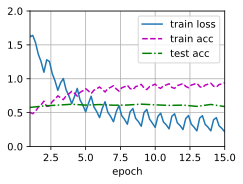

In [ ]:
train_Discrim(best_gan,train_loader_augmented,test_loader, num_epochs = 15, lr = 5e-5)

In [ ]:
torch.save(best_gan,'/content/drive/MyDrive/Deep Learning/best_gan_trained.pth')

In [ ]:
best_gan = prepare(Master_Discriminator_3(1))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True


To give a visual comparison on the effectiveness of the data augmentation on the overfitting problem, below we run exactly the same model as below but without the data augmentation step.

It is clearly visible that the different trends are much more smooth, but the train accuracy reaches very quickly high values preventing the test accuracy from growing further 56%.

In [ ]:
train_Discrim(best_gan,train_loader,test_loader, num_epochs = 10, lr = 1e-4)

loss 0.026, train acc 0.996, test acc 0.562
1027.0 examples/sec on cuda:0


In [ ]:
torch.save(best_gan,'/content/drive/MyDrive/Deep Learning/no_augm_best_gan_trained.pth')

In [ ]:
best_gan = prepare(Master_Discriminator_3(1))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True


Now we implement the model on the data augmented but with a slightly higher learning rate.
Regardless the ambiguity in the cross validation part, here is evident how the bigger learning rate allows more precision in the optimization step and a higher test accuracy, which has risen from 58% to 60%.

loss 0.299, train acc 0.914, test acc 0.602
1074.7 examples/sec on cuda:0


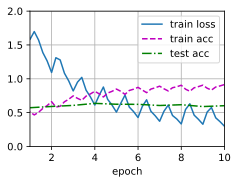

In [ ]:
train_Discrim(best_gan,train_loader_augmented,test_loader, num_epochs = 10, lr = 1e-4)

In [ ]:
torch.save(best_gan,'/content/drive/MyDrive/Deep Learning/CORRECT_HIGHER_LR_augm_best_gan_trained.pth')

### Predictions

As in the CNN case, we perform some additional analysis of the performance of the model ( with learning rate 0.0001), along side with the visualization of few predictions.

In [ ]:
gan_trues, gan_preds = predict(best_gan, test_loader)

In [ ]:
gan_tr = [None]*64*len(gan_trues)
gan_pr = [None]*64*len(gan_trues)
l = 0
for i,j in zip(gan_trues, gan_preds):
  for k in range(len(i)):
    i = list(i)
    j = list(j)
    gan_tr[l] = i[k].item()
    gan_pr[l] = j[k].item()
    l += 1

In [ ]:
gan_trues = torch.Tensor(gan_tr[:699])
gan_preds = torch.Tensor(gan_pr[:699])

True: Albrecht_Dürer vs Pred: Albrecht_Dürer


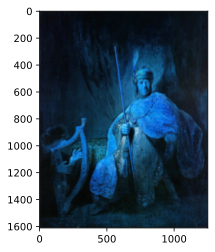

True: Alfred_Sisley vs Pred: Alfred_Sisley


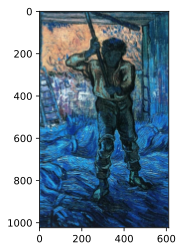

True: Rembrandt vs Pred: Rembrandt


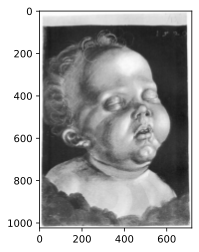

True: Alfred_Sisley vs Pred: Alfred_Sisley


True: Vincent_van_Gogh vs Pred: Vincent_van_Gogh


True: Henri_Matisse vs Pred: Henri_Matisse


In [ ]:
prediction_print(trues=gan_trues,preds=gan_preds)

### Metrics

In [ ]:
confmat = ConfusionMatrix(task="multiclass", num_classes=18)

In [ ]:
gan_confusion_mat = confmat(gan_preds,gan_trues)
gan_confusion_mat
# True Values -> Riga
# Predicted Values -> Colonna

tensor([[20,  1,  1,  0,  2,  2,  0,  0,  0,  0,  0,  0,  1,  0,  1,  6,  1,  0],
        [ 1, 14,  0,  5,  4,  1,  3,  0,  0,  0,  0,  3,  4,  1,  0,  1,  1,  0],
        [ 3,  3, 16,  0,  1,  0,  4,  2,  0,  2,  2,  0,  1,  4,  0,  1,  1,  0],
        [ 1,  4,  1, 18,  0,  0,  5,  0,  0,  0,  2,  3,  2,  1,  0,  0,  0,  0],
        [ 1,  0,  1,  0, 24,  0,  1,  0,  0,  1,  0,  2,  4,  0,  2,  1,  2,  1],
        [ 0,  1,  0,  0,  0, 36,  1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0],
        [ 2,  1,  1,  0,  2,  1, 23,  1,  1,  2,  0,  1,  0,  0,  1,  1,  2,  0],
        [ 2,  0,  1,  0,  3,  0,  1, 17,  1,  1,  0,  0,  2,  1,  5,  0,  0,  6],
        [ 2,  0,  1,  0,  2,  4,  0,  3, 17,  3,  0,  0,  0,  0,  0,  1,  0,  7],
        [ 2,  0,  1,  0,  0,  1,  2,  2,  0, 19,  0,  0,  5,  0,  1,  0,  7,  0],
        [ 2,  2,  0,  0,  0,  0,  1,  0,  0,  0, 28,  1,  4,  1,  1,  0,  0,  0],
        [ 1,  2,  6,  1,  1,  0,  1,  0,  0,  1,  0, 22,  1,  1,  0,  1,  0,  0],
        [ 2,  1,

In [ ]:
good = 0
for i in range(18):
  good += gan_confusion_mat[i][i].item()

In [ ]:
good/torch.sum(gan_confusion_mat)

tensor(0.6023)

In [ ]:
gan_matr = gan_confusion_mat/torch.sum(gan_confusion_mat)
gan_matr = gan_matr.tolist()

In [ ]:
gan_df = pd.DataFrame(gan_matr,columns=artists_dirs,index=artists_dirs)

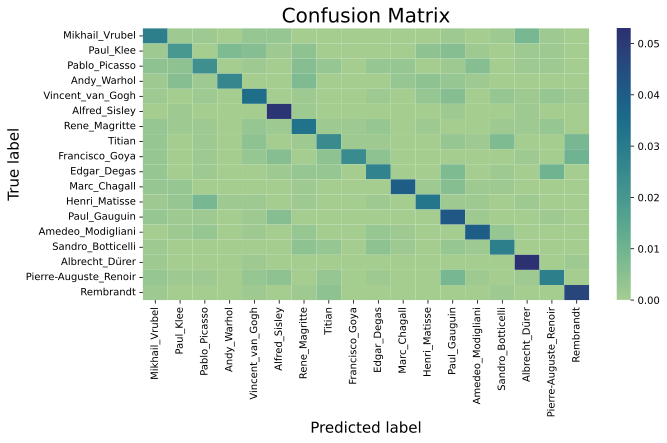

In [ ]:
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(gan_df, annot=False, cmap="crest")
plt.title('Confusion Matrix', fontsize = 20) # title with fontsize 20
plt.ylabel('True label', fontsize = 15) # x-axis label with fontsize 15
plt.xlabel('Predicted label', fontsize = 15) # y-axis label with fontsize 15

plt.show()

As before the confusion matrix highlights the ability of the network to correctly classify the paintings even with some errors, especially for authors with similar style.

In [ ]:
# Accuracy
accuracy = torchmetrics.Accuracy(task="multiclass", average=None, num_classes=18)
accuracy(gan_preds,gan_trues)

tensor([0.5714, 0.3684, 0.4000, 0.4865, 0.6000, 0.9000, 0.5897, 0.4250, 0.4250,
        0.4750, 0.7000, 0.5789, 0.7250, 0.7179, 0.6061, 0.9250, 0.5000, 0.8250])

The comment reported just above is represented also by the above probabilities.

In [ ]:
# Precision Macro
precision_macro = torchmetrics.Precision(task="multiclass", average=None, num_classes=18)
precision_macro(gan_preds,gan_trues)

tensor([0.4545, 0.4516, 0.4848, 0.7500, 0.5333, 0.6923, 0.4792, 0.5312, 0.8947,
        0.5429, 0.8235, 0.6875, 0.4677, 0.7000, 0.5882, 0.7255, 0.5714, 0.6875])

In [ ]:
# Precision Micro
precision_micro = torchmetrics.Precision(task="multiclass", average=None, num_classes=18)
precision_micro(gan_preds,gan_trues)

tensor([0.4545, 0.4516, 0.4848, 0.7500, 0.5333, 0.6923, 0.4792, 0.5312, 0.8947,
        0.5429, 0.8235, 0.6875, 0.4677, 0.7000, 0.5882, 0.7255, 0.5714, 0.6875])

In [ ]:
# Recall Macro
recall_macro = torchmetrics.Recall(task="multiclass", average=None, num_classes=18)
recall_macro(gan_preds,gan_trues)

tensor([0.5714, 0.3684, 0.4000, 0.4865, 0.6000, 0.9000, 0.5897, 0.4250, 0.4250,
        0.4750, 0.7000, 0.5789, 0.7250, 0.7179, 0.6061, 0.9250, 0.5000, 0.8250])

In [ ]:
# Recall Micro
recall_micro = torchmetrics.Recall(task="multiclass", average=None, num_classes=18)
recall_micro(gan_preds,gan_trues)

tensor([0.5714, 0.3684, 0.4000, 0.4865, 0.6000, 0.9000, 0.5897, 0.4250, 0.4250,
        0.4750, 0.7000, 0.5789, 0.7250, 0.7179, 0.6061, 0.9250, 0.5000, 0.8250])

In [ ]:
# F1 Score
f1 = torchmetrics.classification.MulticlassF1Score(num_classes=18, average= None)
f1(gan_preds,gan_trues)

tensor([0.5063, 0.4058, 0.4384, 0.5902, 0.5647, 0.7826, 0.5287, 0.4722, 0.5763,
        0.5067, 0.7568, 0.6286, 0.5686, 0.7089, 0.5970, 0.8132, 0.5333, 0.7500])

In [ ]:
print('Classification Report')
print(classification_report(gan_trues, gan_preds, target_names = artists_dirs))

Classification Report
                       precision    recall  f1-score   support

       Mikhail_Vrubel       0.45      0.57      0.51        35
            Paul_Klee       0.45      0.37      0.41        38
        Pablo_Picasso       0.48      0.40      0.44        40
          Andy_Warhol       0.75      0.49      0.59        37
     Vincent_van_Gogh       0.53      0.60      0.56        40
        Alfred_Sisley       0.69      0.90      0.78        40
        Rene_Magritte       0.48      0.59      0.53        39
               Titian       0.53      0.42      0.47        40
       Francisco_Goya       0.89      0.42      0.58        40
          Edgar_Degas       0.54      0.47      0.51        40
         Marc_Chagall       0.82      0.70      0.76        40
        Henri_Matisse       0.69      0.58      0.63        38
         Paul_Gauguin       0.47      0.72      0.57        40
    Amedeo_Modigliani       0.70      0.72      0.71        39
    Sandro_Botticelli       0.59

As in the CNN case we se a large variation in all the metrics (including the accuracies) between some classes which can be justified by the overlap of styles and subjects in the paintings that can make the classification work harder for the network.

As a matter of facts style recognition is a relatively hard task for a neutral network since it involves many unique combinations of both styles and subjects.

# Conclusions

In conclusion, comparing the metrics of the CNN and the GAN model we obtain very similar results for the accuracy and other metrics both overall and for each single class.
This brings to the conclusion that the difficulties encountered by the 2 models in the style identification are very similar and both model have more or less the same predictive power.
Finally, starting from different techniques we end up to similar results with an overall accuracy for both models around 60%.